In [7]:
import os
import pandas as pd

# 입력 파일 이름
#input_file_name = './data/ucosmos-balance.csv'
#input_file_name = './data/ujuno-balance.csv'
#input_file_name = './data/ukava-balance.csv'
input_file_name = './data/uosmo-balance.csv'

# 데이터셋 로드
df = pd.read_csv(input_file_name)

# '_time' 열을 datetime 형식으로 변환
df['_time'] = pd.to_datetime(df['_time'])

# Filter out rows where 'amountValue' is -1
df = df[df['amountValue'] != -1]

# '2023-01-27T17:00:00Z' 이전의 데이터 필터링
data = df[df['_time'] >= '2023-01-21T17:00:00Z']

# Group by 'moduleType' and 'moduleName' and calculate descriptive statistics for each group
grouped = df.groupby(['moduleType', 'moduleName'])['amountValue'].describe()

# Print the result
print(grouped)

# 파일의 기본 이름(디렉토리 없음)을 가져와서 파일 확장자 제거
base_file_name = os.path.basename(input_file_name)
base_file_name_without_extension = os.path.splitext(base_file_name)[0]

# 결과 파일이 저장될 디렉토리 정의
output_directory = './result-files/'

# 출력 파일 이름 생성
output_file_name = output_directory + base_file_name_without_extension + '.grouped_data.csv'

# Save the result to a csv file
grouped.to_csv(output_file_name)

                                    count          mean           std   
moduleType moduleName                                                   
EXCHANGE   Binance #01 (Deposit)   1607.0  6.997338e+11  2.029016e+12  \
MODULE     bonded_tokens_pool      2487.0  2.275271e+14  1.164068e+13   
           distribution            2487.0  8.408838e+13  6.336680e+12   
           fee_collector           2405.0  2.964191e+04  3.434719e+04   
           gov                     2433.0  7.217265e+09  3.337766e+09   
           mint                    2487.0  5.310000e+02  0.000000e+00   
           not_bonded_tokens_pool  2487.0  6.904963e+12  4.148782e+12   

                                            min           25%           50%   
moduleType moduleName                                                         
EXCHANGE   Binance #01 (Deposit)   5.480000e+02  2.641500e+07  9.847214e+07  \
MODULE     bonded_tokens_pool      2.130600e+14  2.158085e+14  2.276540e+14   
           distribution   

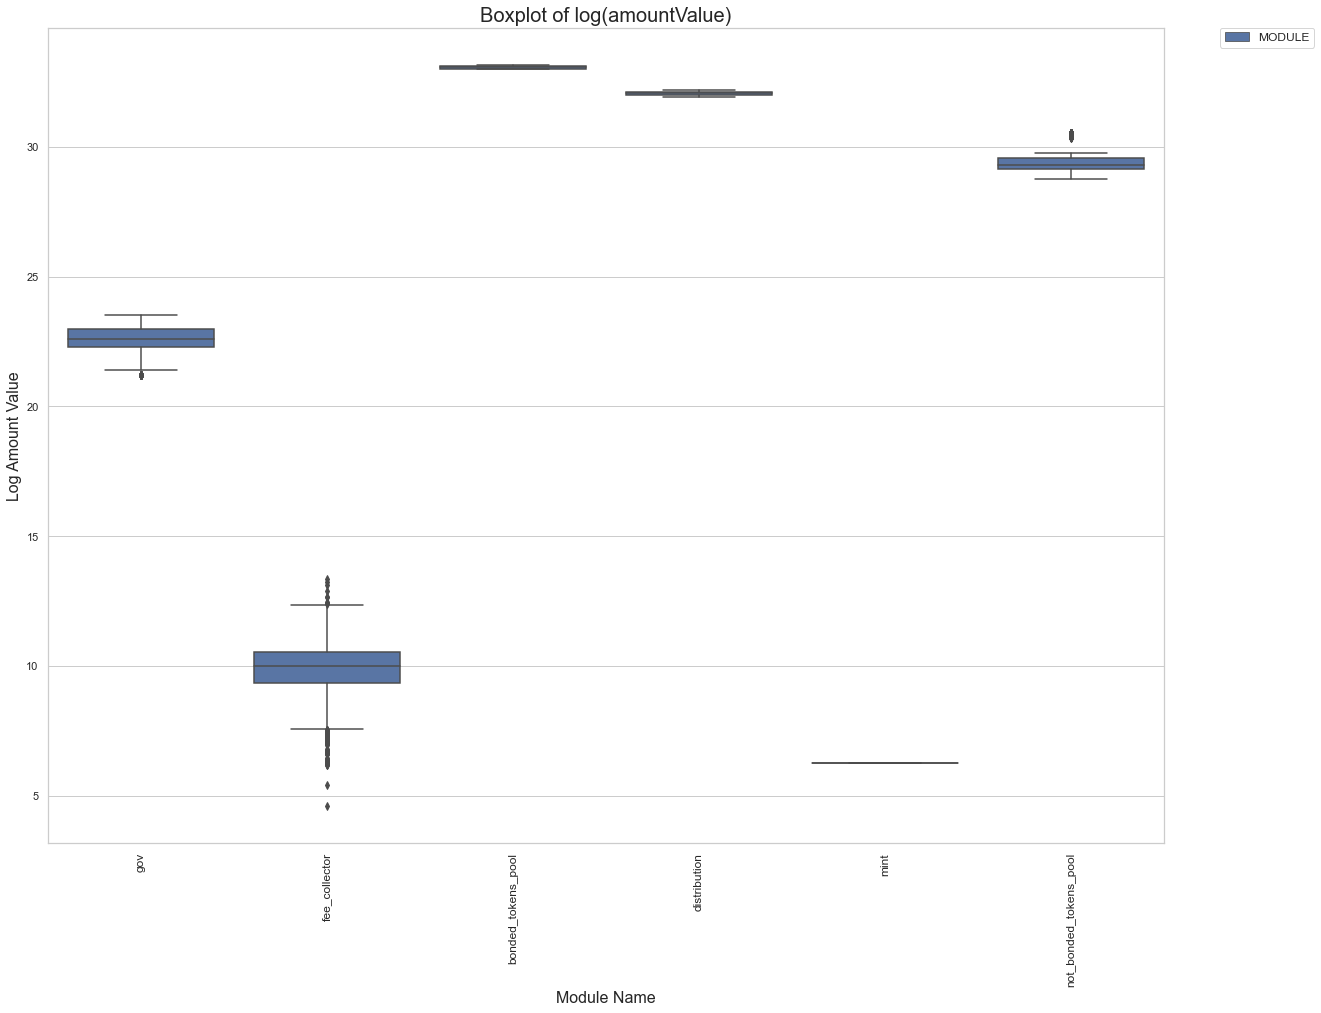

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color to white
sns.set(style="whitegrid")

# Continue with your existing code...

# Filter out moduleNames with less than 2000 amountValues
counts = df['moduleName'].value_counts()
df = df[df['moduleName'].isin(counts[counts >= 2000].index)]

# Convert amountValue to log scale
df['log_amountValue'] = np.log(df['amountValue'])

# Boxplot
plt.figure(figsize=(20,15))  # Increase the size of the figure
sns.boxplot(data=df, x='moduleName', y='log_amountValue', hue='moduleType')
plt.title('Boxplot of log(amountValue)', fontsize=20)
plt.xlabel('Module Name', fontsize=16)
plt.ylabel('Log Amount Value', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better visibility if they are long
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)  # Place legend outside plot
plt.savefig(output_directory + base_file_name_without_extension + '_boxplot.png')
plt.show()


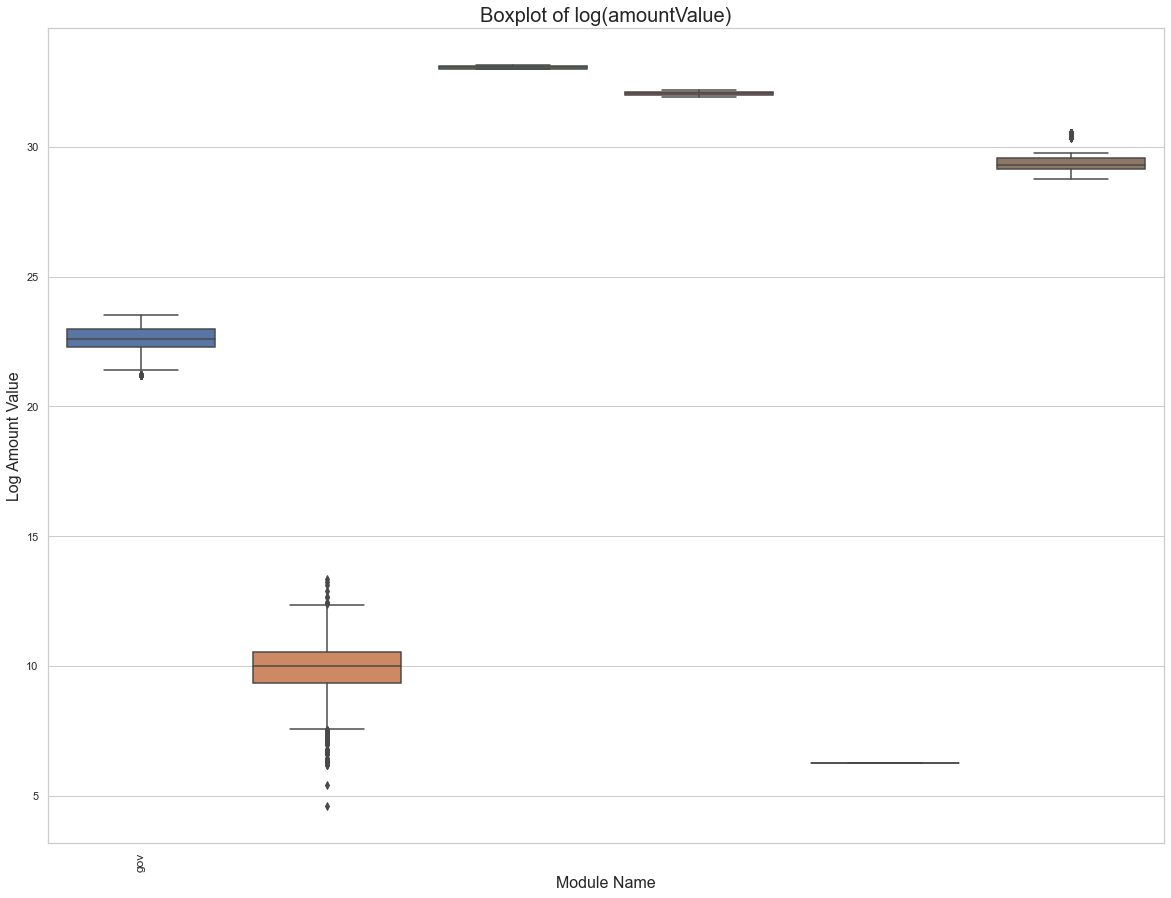

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the background color to white
sns.set(style="whitegrid")

# Continue with your existing code...

# Filter out moduleNames with less than 2000 amountValues
counts = df['moduleName'].value_counts()
df = df[df['moduleName'].isin(counts[counts >= 2000].index)]

# Convert amountValue to log scale
df['log_amountValue'] = np.log(df['amountValue'])

df.describe()

# Boxplot
fig, ax = plt.subplots(figsize=(20,15))  # Increase the size of the figure
sns.boxplot(data=df, x='moduleName', y='log_amountValue', ax=ax)
plt.title('Boxplot of log(amountValue)', fontsize=20)
plt.xlabel('Module Name', fontsize=16)
plt.ylabel('Log Amount Value', fontsize=16)

# Display only every nth X-axis label
n = 10  # Choose every nth label to display
for index, label in enumerate(ax.xaxis.get_ticklabels()):
    if index % n != 0:
        label.set_visible(False)

plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels for better visibility if they are long
plt.savefig(output_directory + base_file_name_without_extension + '_boxplot.png')
plt.show()


/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


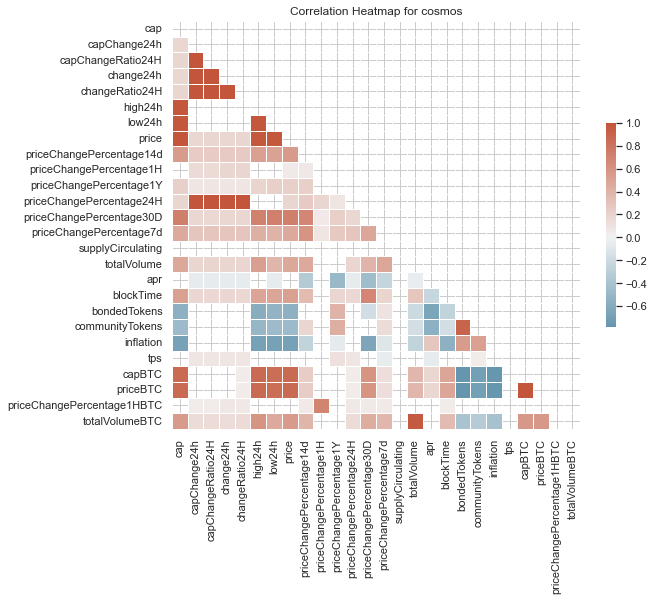

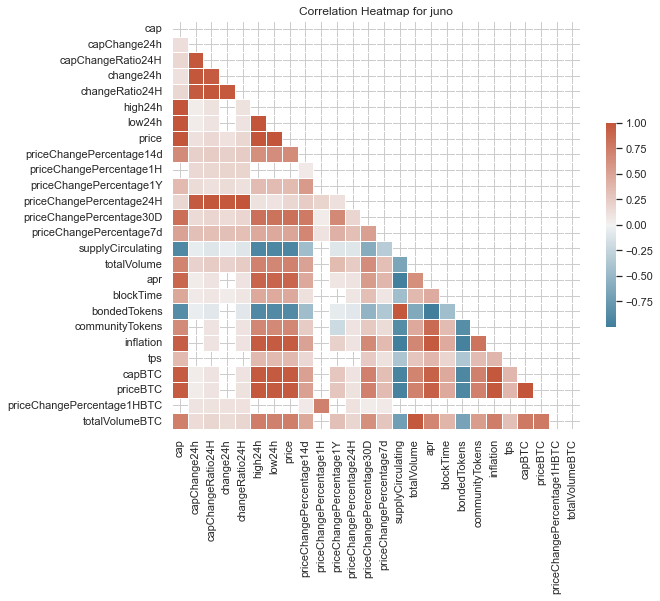

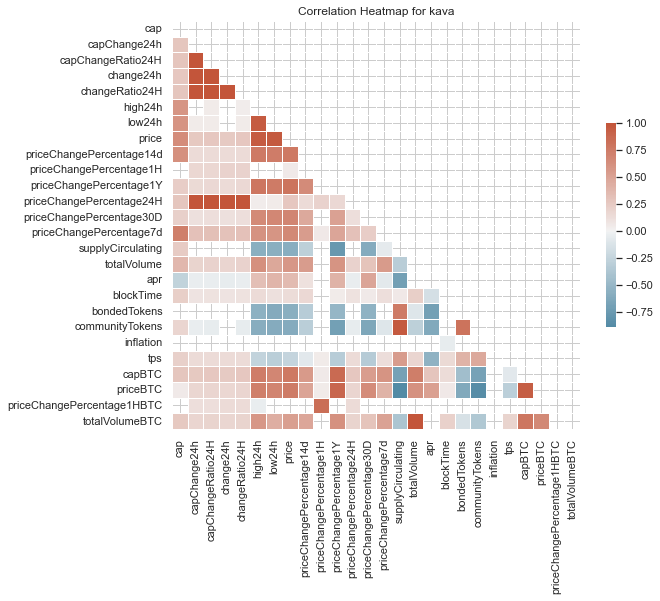

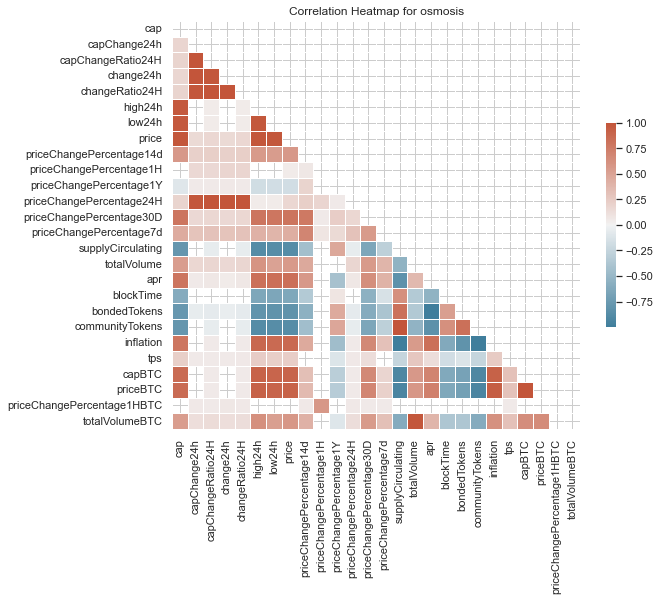

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 결과 csv 파일 불러오기
df = pd.read_csv('./result-files/market-chain.result.processed.csv')

# '_time' 열 삭제
df = df.drop(columns=['_time'])

# 고유한 체인 이름 얻기
chain_names = df['chainName'].unique()

# Create a DataFrame to store the correlation results
data = []

# 각 체인 이름별로 상관관계 히트맵 생성
for chain_name in chain_names:
    chain_df = df[df['chainName'] == chain_name]

    # 상관관계 계산 전 'chainName', 'altDate', 'athDate' 등의 열 삭제
    chain_df = chain_df.drop(columns=['chainName', 'atlDate', 'athDate', 'capRank', 'atl', 'ath', 'Unnamed: 0'])

    # 상관관계 행렬 계산
    corr = chain_df.corr()
    p_values = pd.DataFrame(index=chain_df.columns, columns=chain_df.columns)

    # 각 열 쌍에 대해 피어슨 상관계수와 p-값 계산
    for col1 in chain_df.columns:
        for col2 in chain_df.columns:
            if col1 == col2:
                p_values.loc[col1, col2] = 0  # 대각선 값
            else:
                r, p = pearsonr(chain_df[col1].dropna(), chain_df[col2].dropna())
                p_values.loc[col1, col2] = p
                # Check if correlation is greater than or equal to 0.5 or less than -0.5 and p-value is less than 0.05
                if (r >= 0.5 or r <= -0.5) and p < 0.05:
                    # Append a dictionary to the data list
                    data.append({
                        'chainName': chain_name,
                        'fig1': col1,
                        'fig2': col2,
                        'corr': r,
                        'p_values': p
                    })

    # p_values를 float 데이터타입으로 변환
    p_values = p_values.astype(float)

    # p-값이 0.05보다 큰 모든 상관관계를 NaN으로 설정
    corr[p_values > 0.05] = np.nan

    # 상관관계 행렬에서 최대 및 최소 값을 가져옵니다.
    vmin = corr.min().min()
    vmax = corr.max().max()

    # 상단 삼각형에 대한 마스크 생성
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # matplotlib 그림 설정
    f, ax = plt.subplots(figsize=(11, 9))

    # 사용자 정의 발산 컬러맵 생성
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # 마스크와 올바른 종횡비를 가진 히트맵 그리기
    # vmin과 vmax 파라미터를 사용하여 색상 바에 표시되는 값의 범위를 지정합니다.
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # 히트맵에 제목 설정
    plt.title(f'Correlation Heatmap for {chain_name}')
    
    # 그래프 여백 조정
    plt.subplots_adjust(bottom=0.25, left=0.25)
    
    # 히트맵을 PNG 파일로 저장
    plt.savefig(f'./result-files/market-heatmap.pvalue.{chain_name}.png')
    
    plt.show()

# Convert the list of dictionaries into a DataFrame
corr_results = pd.DataFrame(data)

# Save the DataFrame as a CSV file
corr_results.to_csv('./result-files/chain-market.correlation-result.csv', index=False)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


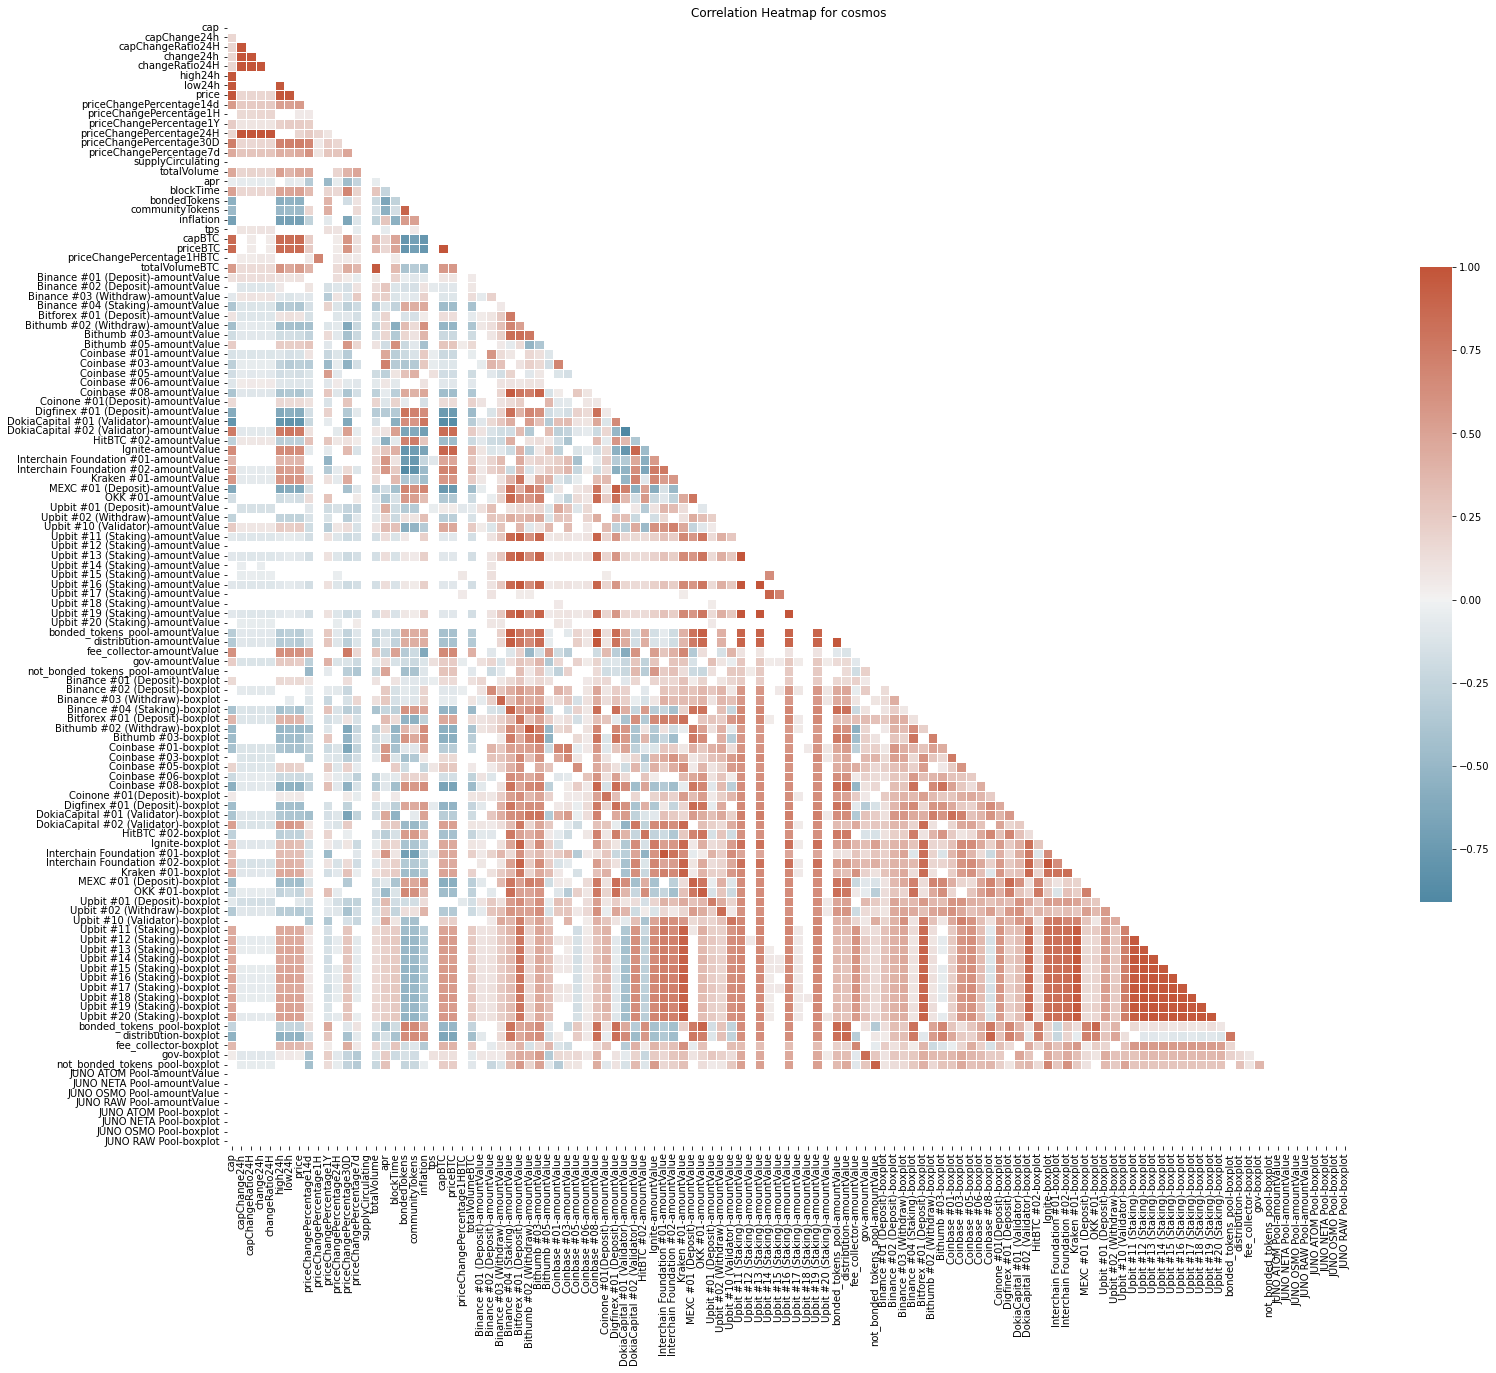

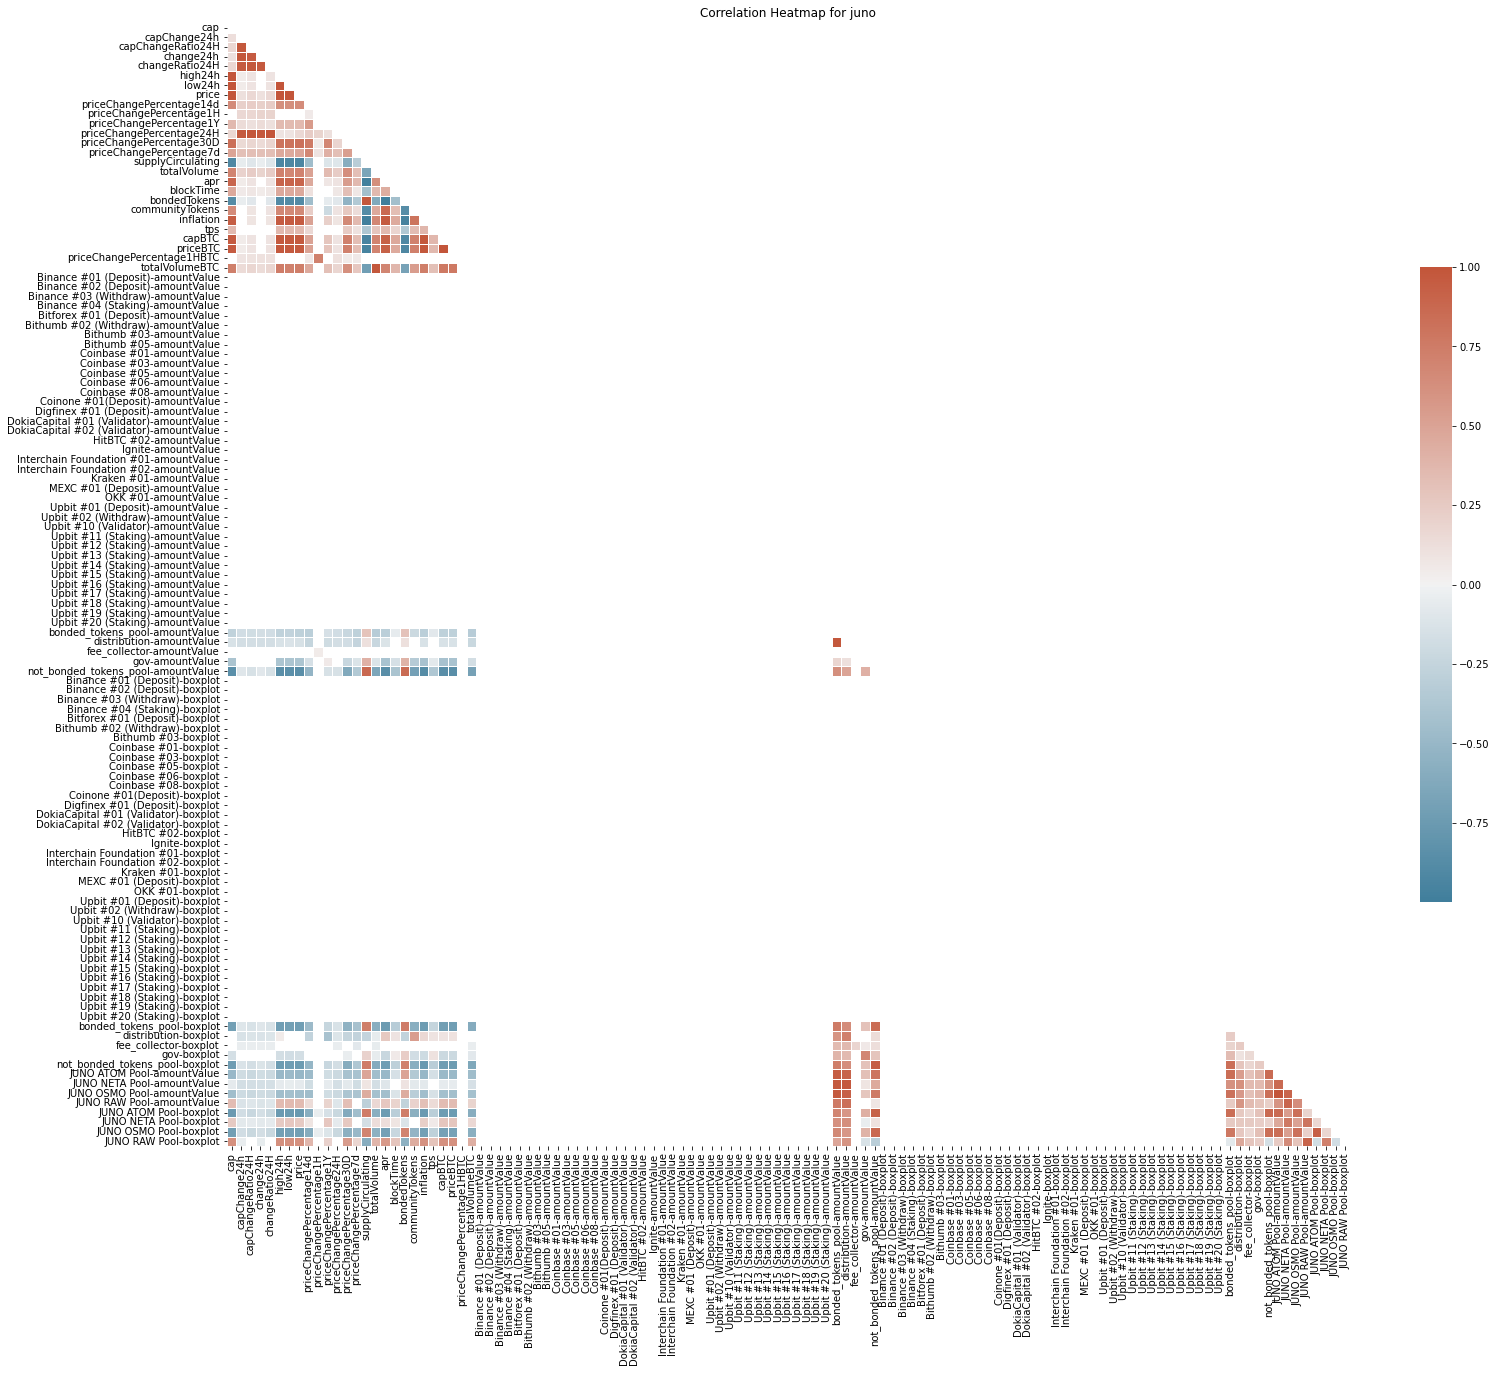

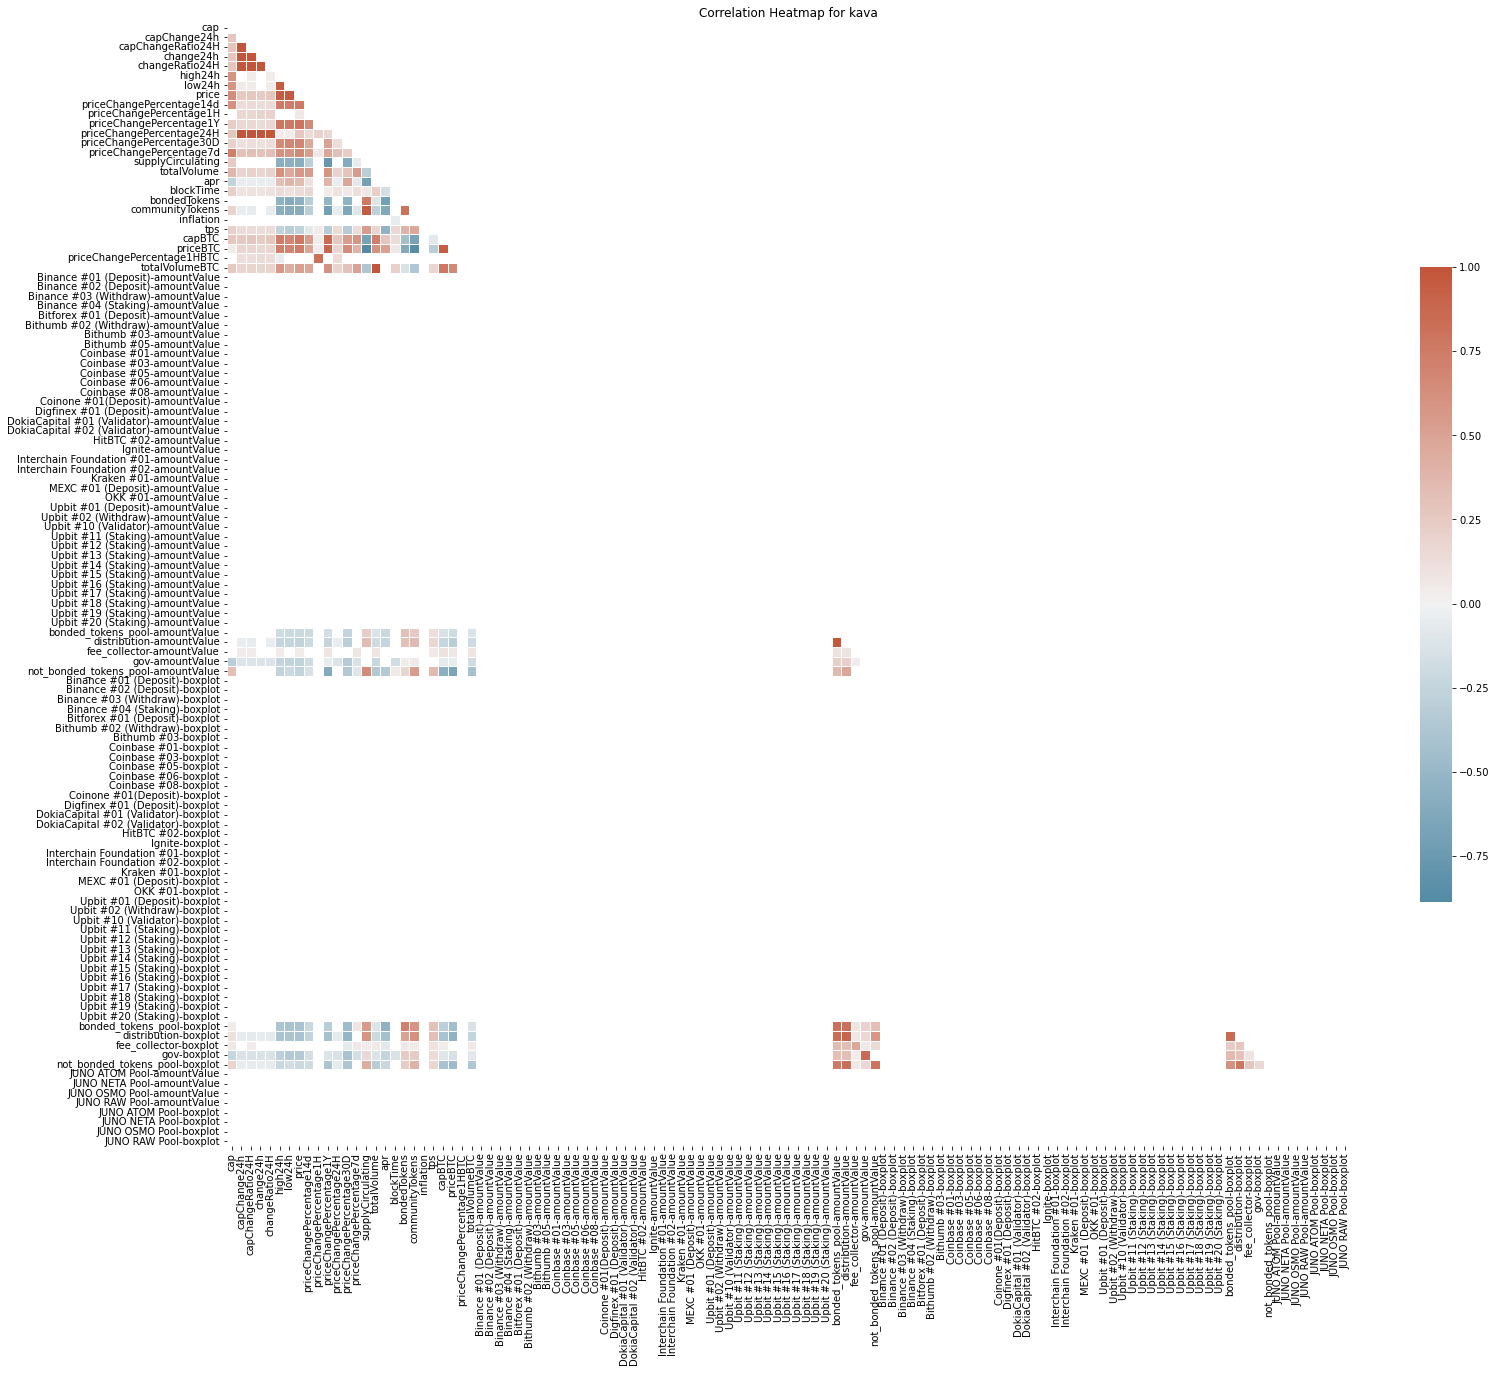

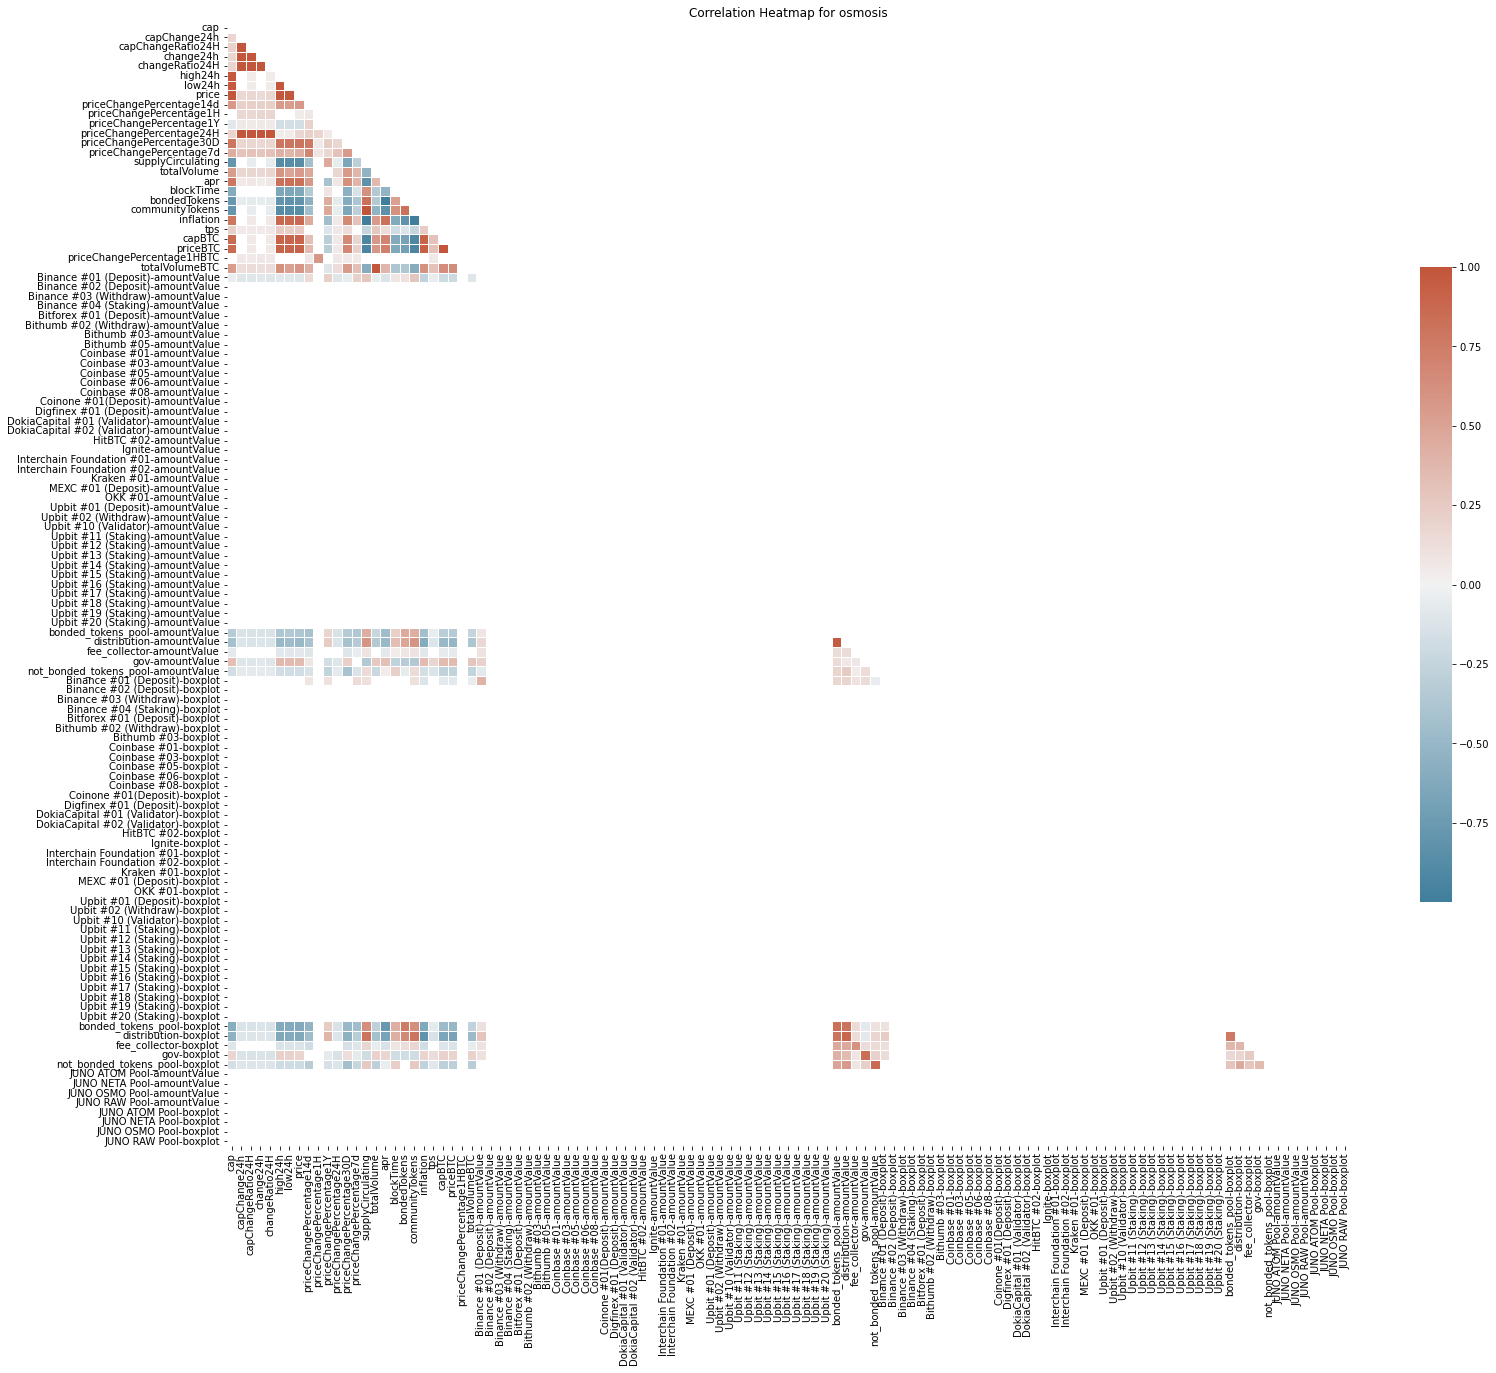

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# 결과 csv 파일 불러오기
df = pd.read_csv('./result-files/market-chain-balance.result.csv')

# '_time' 열 삭제
df = df.drop(columns=['_time'])

# 고유한 체인 이름 얻기
chain_names = df['chainName'].unique()

# Create a DataFrame to store the correlation results
data = []

# 각 체인 이름별로 상관관계 히트맵 생성
for chain_name in chain_names:
    chain_df = df[df['chainName'] == chain_name]

    # 상관관계 계산 전 'chainName', 'altDate', 'athDate' 등의 열 삭제
    chain_df = chain_df.drop(columns=['chainName', 'atlDate', 'athDate', 'capRank', 'atl', 'ath', 'Unnamed: 0'])

    # 상관관계 행렬 계산
    corr = chain_df.corr()
    p_values = pd.DataFrame(index=chain_df.columns, columns=chain_df.columns)

    # Calculate Pearson's correlation coefficient and p-value for each pair of columns
    for col1 in chain_df.columns:
        for col2 in chain_df.columns:
            if col1 == col2:
                p_values.loc[col1, col2] = 0  # diagonal values
            else:
                x = chain_df[col1].dropna()
                y = chain_df[col2].dropna()
                if len(x) >=2 and len(y) >= 2:
                    r, p = pearsonr(x, y)
                    p_values.loc[col1, col2] = p
                    # Check if correlation is greater than or equal to 0.5 or less than -0.5 and p-value is less than 0.05
                    if (r >= 0.5 or r <= -0.5) and p < 0.05:
                        # Append a dictionary to the data list
                        data.append({
                            'chainName': chain_name,
                            'fig1': col1,
                            'fig2': col2,
                            'corr': r,
                            'p_values': p
                        })

    # p_values를 float 데이터타입으로 변환
    p_values = p_values.astype(float)

    # p-값이 0.05보다 큰 모든 상관관계를 NaN으로 설정
    corr[p_values > 0.05] = np.nan

    # 상관관계 행렬에서 최대 및 최소 값을 가져옵니다.
    vmin = corr.min().min()
    vmax = corr.max().max()

    # 상단 삼각형에 대한 마스크 생성
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # matplotlib 그림 설정
    f, ax = plt.subplots(figsize=(30, 28))

    # 사용자 정의 발산 컬러맵 생성
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # 마스크와 올바른 종횡비를 가진 히트맵 그리기
    # vmin과 vmax 파라미터를 사용하여 색상 바에 표시되는 값의 범위를 지정합니다.
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # 히트맵에 제목 설정
    plt.title(f'Correlation Heatmap for {chain_name}')
    
    # 그래프 여백 조정
    plt.subplots_adjust(bottom=0.25, left=0.25)
    
    # 히트맵을 PNG 파일로 저장
    plt.savefig(f'./result-files/market-balance-heatmap.pvalue.{chain_name}.png')
    
    plt.show()

# Convert the list of dictionaries into a DataFrame
corr_results = pd.DataFrame(data)

# Save the DataFrame as a CSV file
corr_results.to_csv('./result-files/chain-market-balance.correlation-result.csv', index=False)

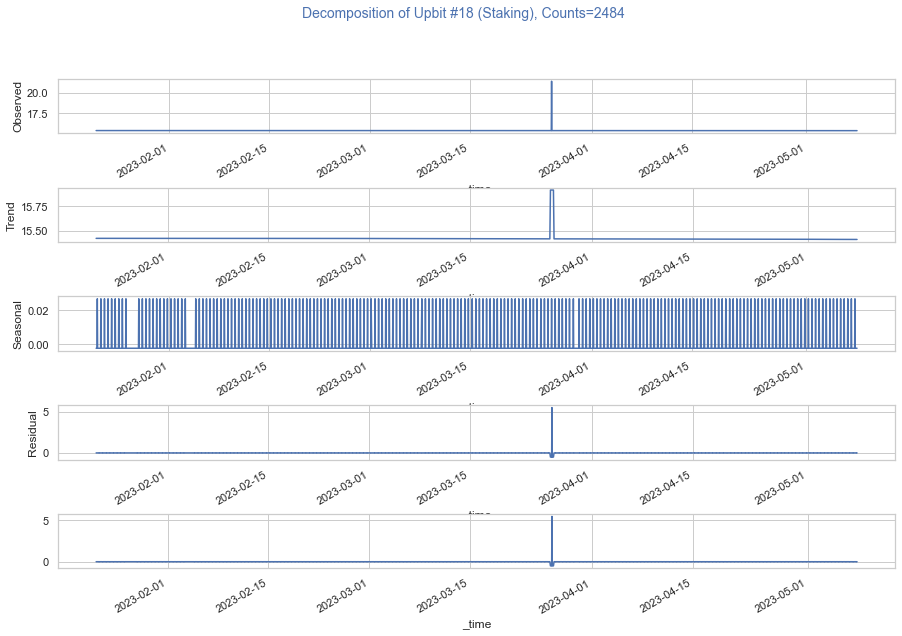

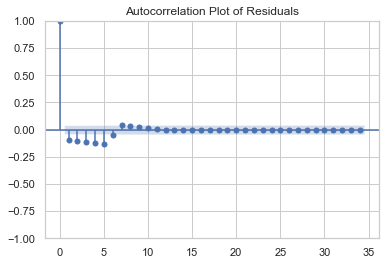

Ljung-Box test results:        lb_stat     lb_pvalue
1    24.207190  8.650870e-07
2    52.310280  4.374889e-12
3    84.603003  3.157691e-18
4   121.378161  2.711912e-25
5   162.930003  2.349587e-33
6   168.043193  1.169427e-33
7   171.749975  1.073336e-33
8   174.137169  1.750150e-33
9   175.493384  4.418025e-33
10  176.107920  1.504479e-32


<Figure size 432x288 with 0 Axes>

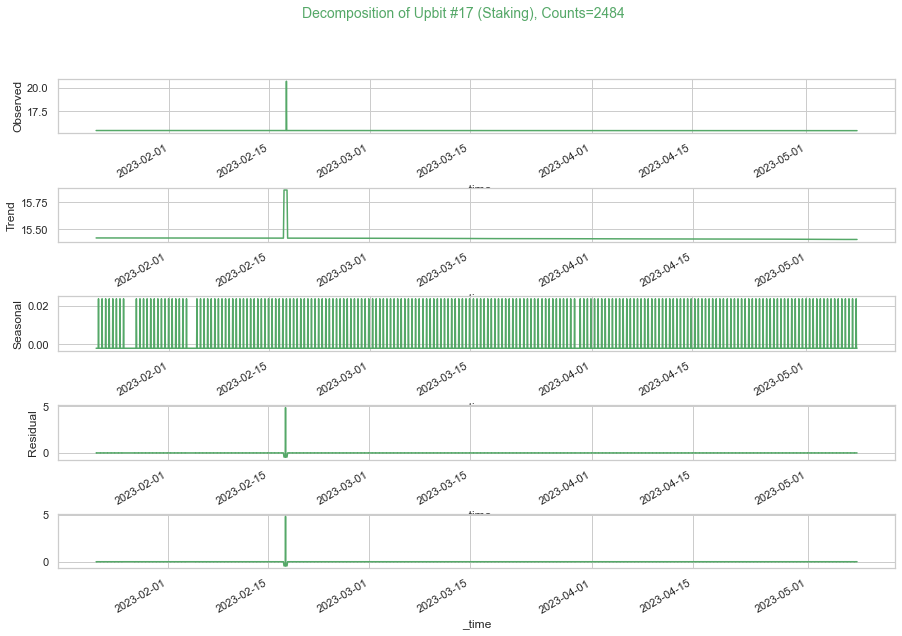

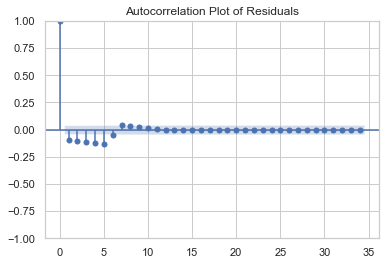

Ljung-Box test results:        lb_stat     lb_pvalue
1    24.204878  8.661265e-07
2    52.306680  4.382770e-12
3    84.595674  3.169149e-18
4   121.376448  2.714198e-25
5   162.930929  2.348519e-33
6   168.044502  1.168679e-33
7   171.751327  1.072632e-33
8   174.138564  1.748971e-33
9   175.494870  4.414873e-33
10  176.109670  1.503223e-32


<Figure size 432x288 with 0 Axes>

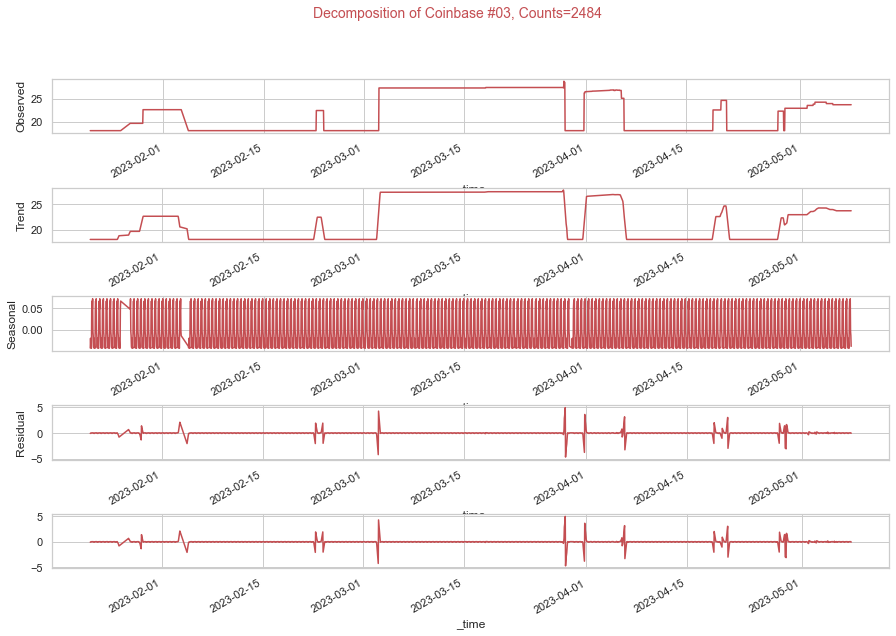

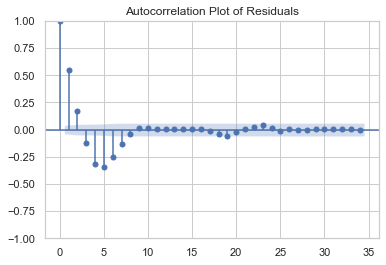

Ljung-Box test results:         lb_stat      lb_pvalue
1    738.753304  1.119084e-162
2    808.962301  2.168045e-176
3    845.788385  5.075387e-183
4   1101.388821  3.785777e-237
5   1397.136942  5.743510e-300
6   1560.165910   0.000000e+00
7   1603.185001   0.000000e+00
8   1607.964582   0.000000e+00
9   1608.239478   0.000000e+00
10  1608.912303   0.000000e+00


<Figure size 432x288 with 0 Axes>

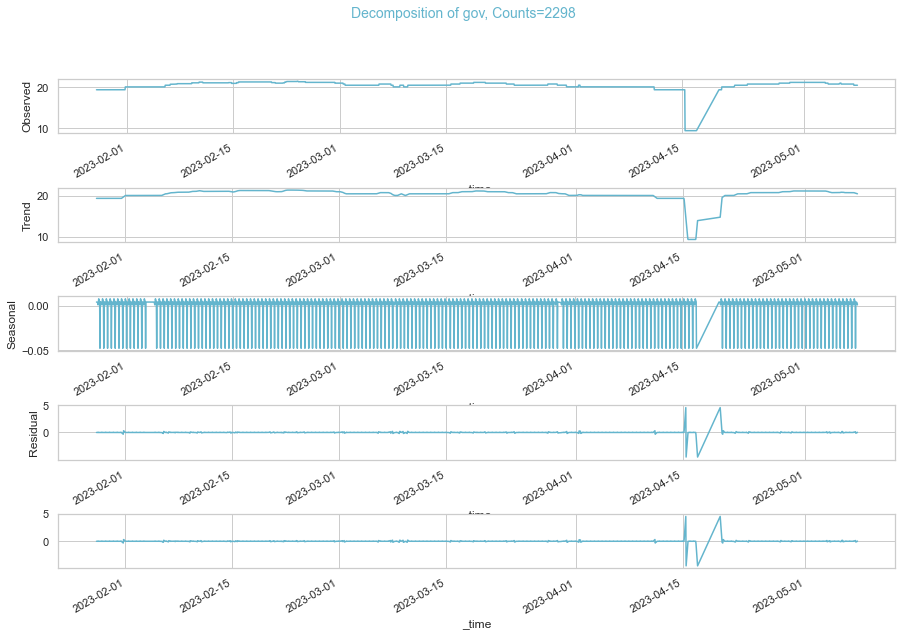

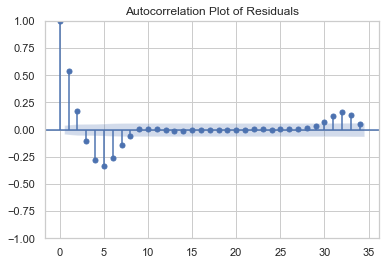

Ljung-Box test results:         lb_stat      lb_pvalue
1    667.611534  3.303903e-147
2    731.599057  1.365474e-159
3    758.736374  3.846329e-164
4    935.859239  2.830454e-201
5   1186.700045  2.232478e-254
6   1341.055561  1.401470e-286
7   1387.419444  2.035306e-295
8   1394.973118  6.914518e-296
9   1394.981801  9.385835e-295
10  1395.137835  1.112499e-293


<Figure size 432x288 with 0 Axes>

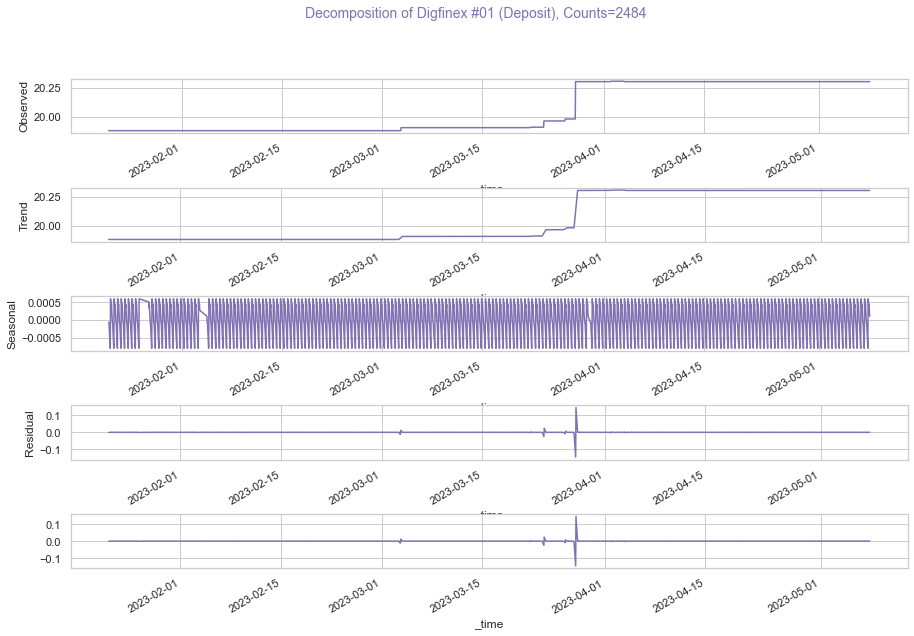

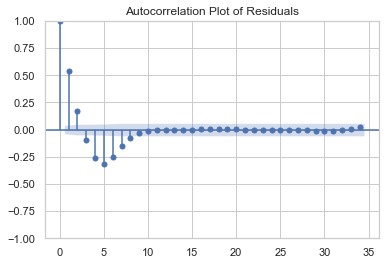

Ljung-Box test results:         lb_stat      lb_pvalue
1    722.533565  3.764799e-159
2    795.307417  2.000731e-173
3    819.944891  2.044515e-177
4    994.455798  5.676692e-214
5   1247.122741  1.821648e-267
6   1407.081251  7.095312e-301
7   1460.818573  2.667497e-311
8   1475.056127   0.000000e+00
9   1477.763163   0.000000e+00
10  1478.074802  1.370702e-311


<Figure size 432x288 with 0 Axes>

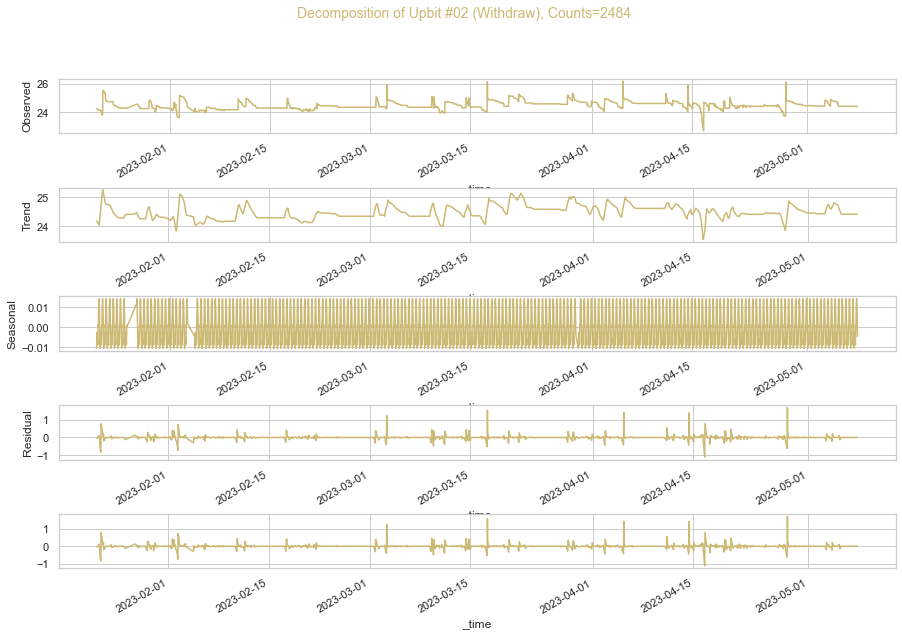

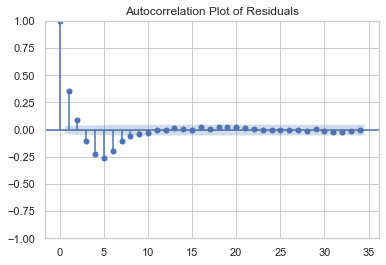

Ljung-Box test results:        lb_stat      lb_pvalue
1   306.130369   1.521299e-68
2   327.052031   9.584154e-72
3   352.438690   4.422011e-76
4   474.281385  2.443090e-101
5   644.749724  4.318184e-137
6   743.648196  2.295235e-157
7   770.095871  5.258220e-162
8   778.120983  1.067649e-162
9   782.274975  1.388513e-162
10  784.246285  5.023462e-162


<Figure size 432x288 with 0 Axes>

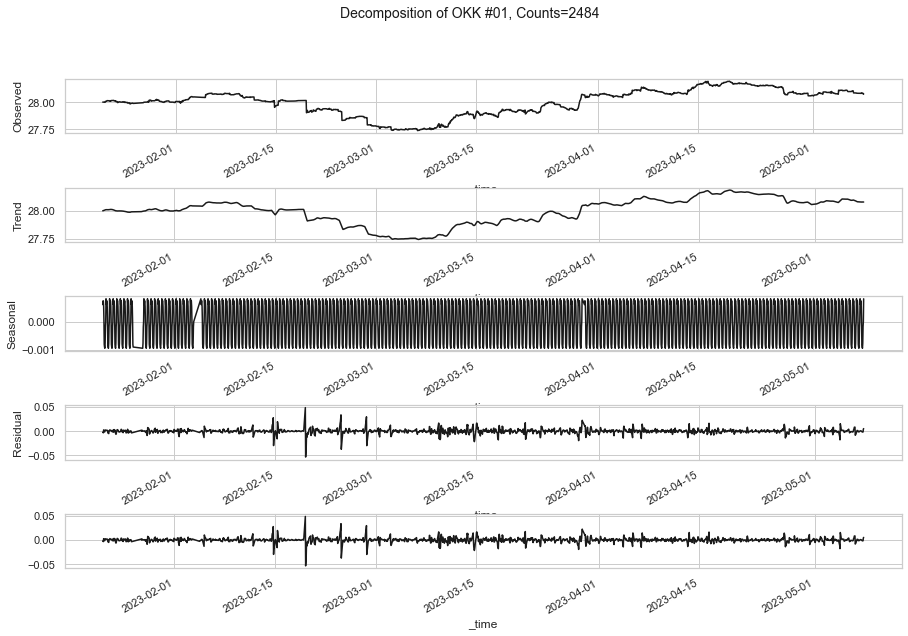

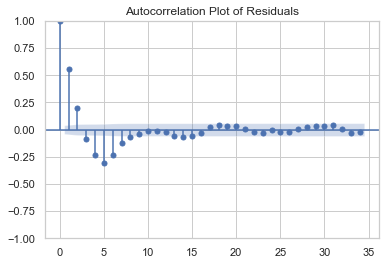

Ljung-Box test results:         lb_stat      lb_pvalue
1    764.802515  2.425735e-168
2    859.398029  2.421525e-187
3    876.134107  1.329279e-189
4   1010.153576  2.249854e-217
5   1243.135069  1.331354e-266
6   1381.382516  2.602517e-295
7   1421.827990  7.302460e-303
8   1433.621438  3.040474e-304
9   1436.866624  8.359944e-304
10  1437.609658  7.510728e-303


<Figure size 432x288 with 0 Axes>

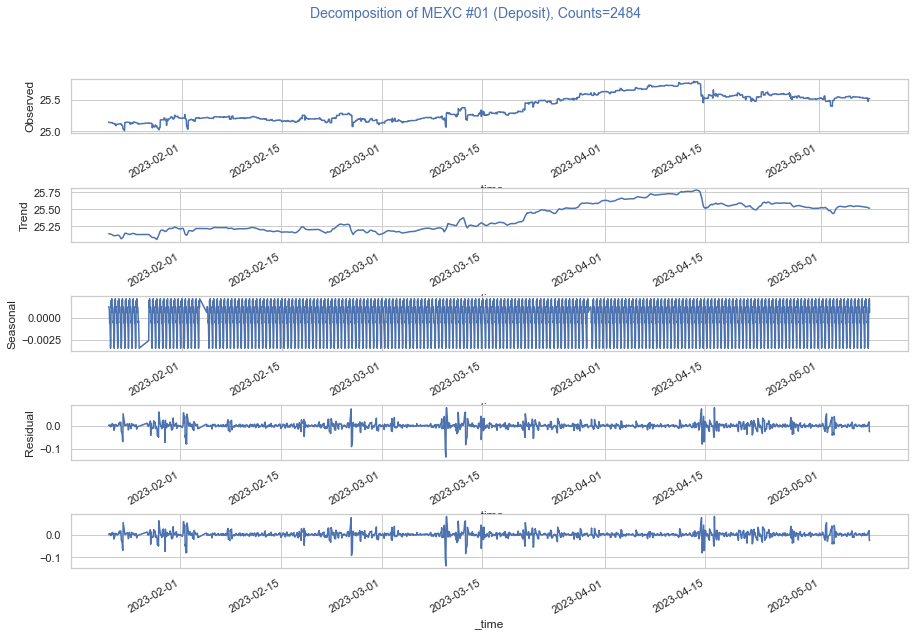

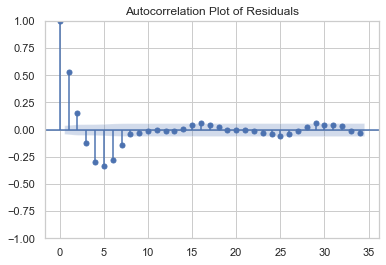

Ljung-Box test results:         lb_stat      lb_pvalue
1    693.255178  8.758308e-153
2    748.349403  3.147689e-163
3    786.660433  3.382533e-170
4   1000.625159  2.612860e-215
5   1277.777440  4.165578e-274
6   1477.943699   0.000000e+00
7   1529.930797   0.000000e+00
8   1534.489457   0.000000e+00
9   1536.979493   0.000000e+00
10  1537.234262   0.000000e+00


<Figure size 432x288 with 0 Axes>

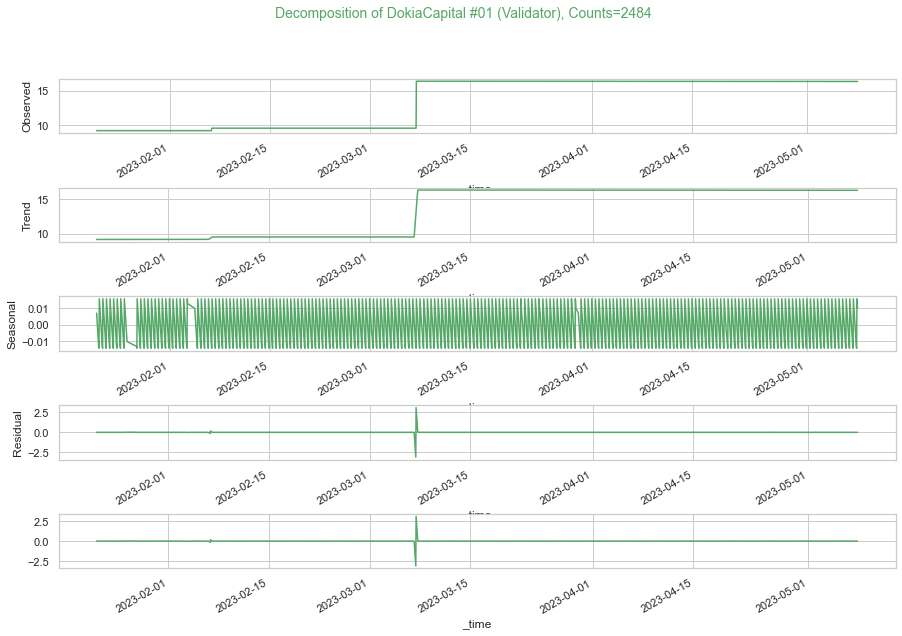

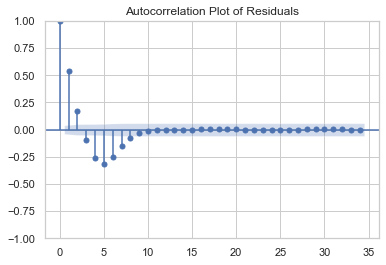

Ljung-Box test results:         lb_stat      lb_pvalue
1    721.912644  5.137589e-159
2    794.588492  2.866166e-173
3    819.096765  3.122730e-177
4    993.486091  9.209616e-214
5   1245.881839  3.382794e-267
6   1405.678891  1.427661e-300
7   1459.196730  5.985193e-311
8   1473.343185   0.000000e+00
9   1475.995744   0.000000e+00
10  1476.319983  3.280472e-311


<Figure size 432x288 with 0 Axes>

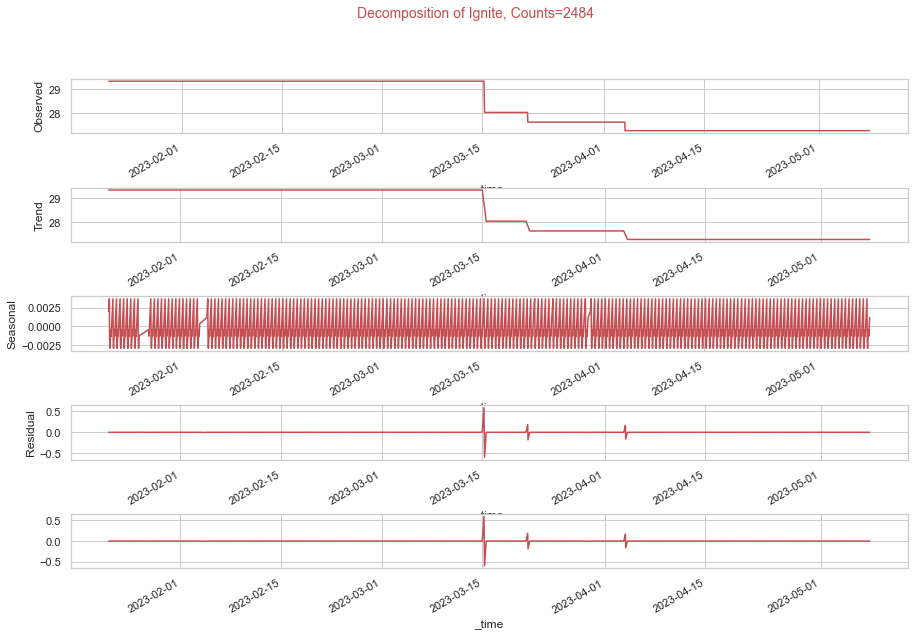

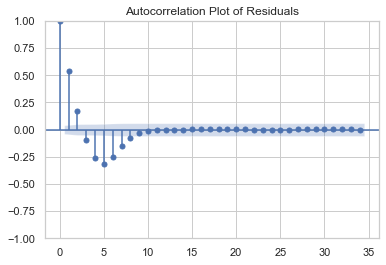

Ljung-Box test results:         lb_stat      lb_pvalue
1    721.559280  6.131934e-159
2    794.532192  2.947994e-173
3    818.850031  3.532211e-177
4    993.258710  1.031615e-213
5   1246.459533  2.535901e-267
6   1406.637610  8.851836e-301
7   1460.544721  3.057502e-311
8   1474.707539   0.000000e+00
9   1477.299372   0.000000e+00
10  1477.602385  1.733695e-311


<Figure size 432x288 with 0 Axes>

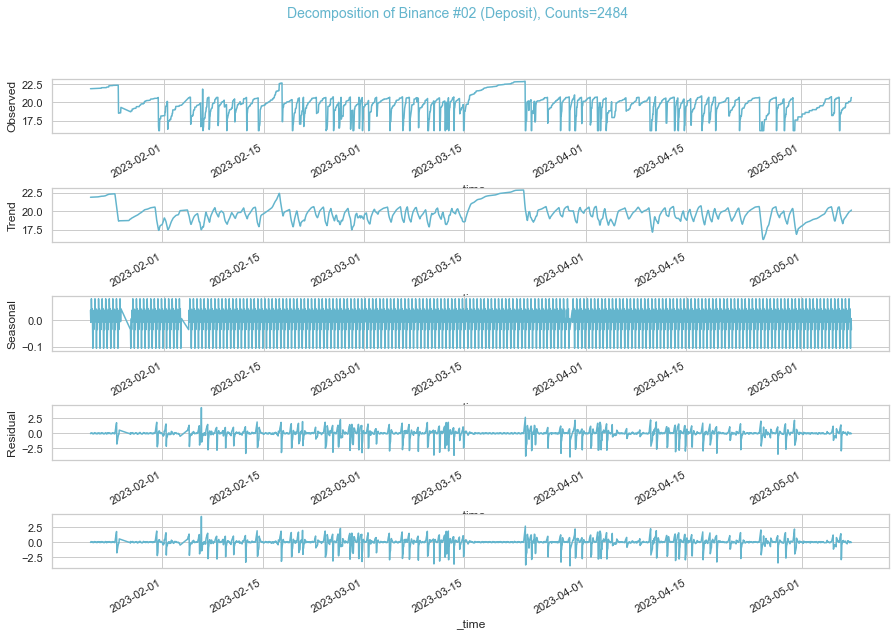

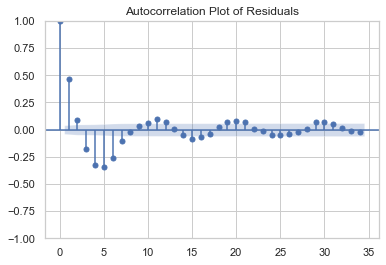

Ljung-Box test results:         lb_stat      lb_pvalue
1    544.831230  1.676553e-120
2    564.239638  2.998606e-123
3    644.303406  2.502943e-139
4    907.070169  4.895341e-195
5   1200.060269  2.850574e-257
6   1370.658323  5.462139e-293
7   1400.477610  3.042575e-298
8   1402.233883  1.861491e-297
9   1404.322148  9.002677e-297
10  1414.526656  7.244568e-298


<Figure size 432x288 with 0 Axes>

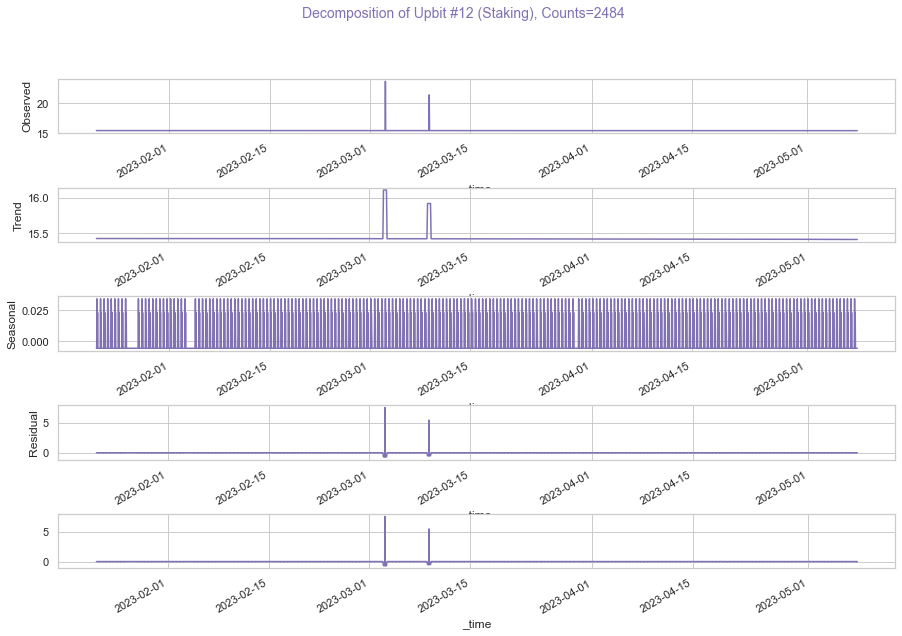

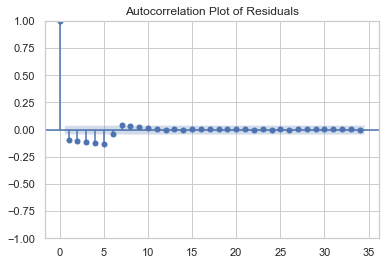

Ljung-Box test results:        lb_stat     lb_pvalue
1    23.979585  9.736262e-07
2    53.184831  2.825274e-12
3    85.213990  2.334653e-18
4   121.705668  2.308392e-25
5   162.954276  2.321756e-33
6   167.968362  1.212942e-33
7   171.755055  1.070692e-33
8   174.206736  1.692323e-33
9   175.612289  4.172783e-33
10  176.072041  1.530479e-32


<Figure size 432x288 with 0 Axes>

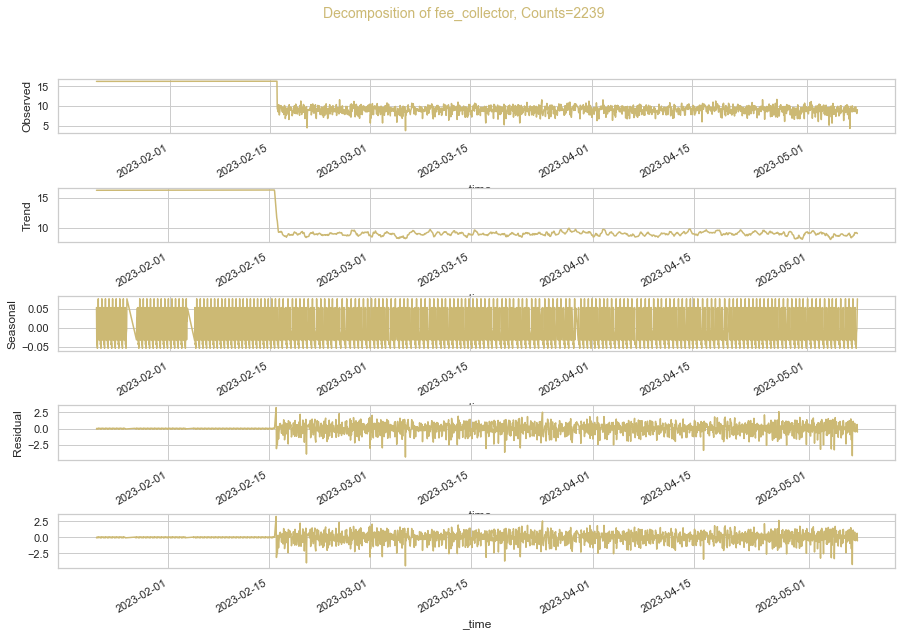

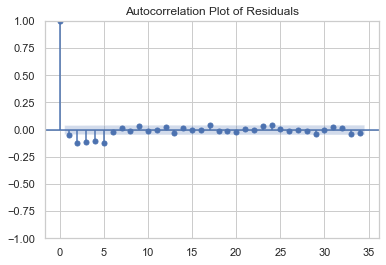

Ljung-Box test results:        lb_stat     lb_pvalue
1     5.594333  1.801867e-02
2    40.814402  1.371720e-09
3    71.771643  1.781688e-15
4    94.657706  1.347556e-19
5   129.637756  2.840834e-26
6   131.109490  7.505197e-26
7   131.473021  3.093944e-25
8   131.811706  1.191206e-24
9   134.144342  1.663764e-24
10  134.515007  5.589820e-24


<Figure size 432x288 with 0 Axes>

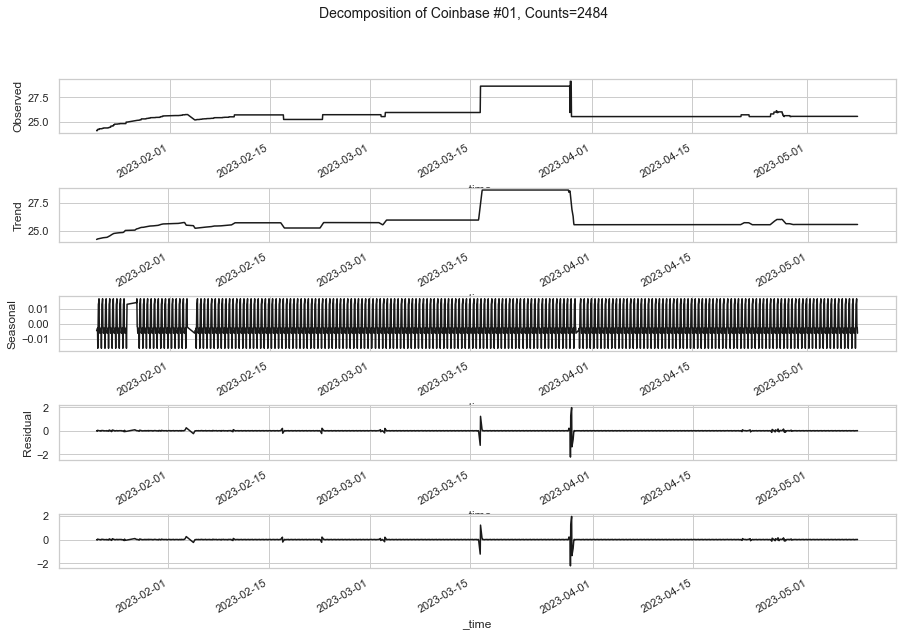

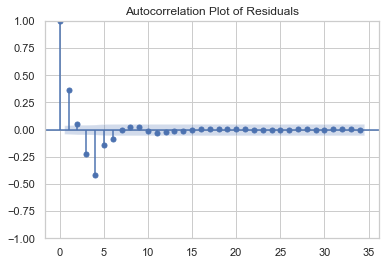

Ljung-Box test results:        lb_stat      lb_pvalue
1   323.977308   1.970489e-72
2   330.134971   2.051644e-72
3   452.560051   9.090089e-98
4   887.689348  7.743112e-191
5   938.197336  1.437756e-200
6   956.166491  2.696984e-203
7   956.193819  3.504581e-202
8   957.757744  1.953429e-201
9   958.884671  1.261676e-200
10  959.125870  1.189227e-199


<Figure size 432x288 with 0 Axes>

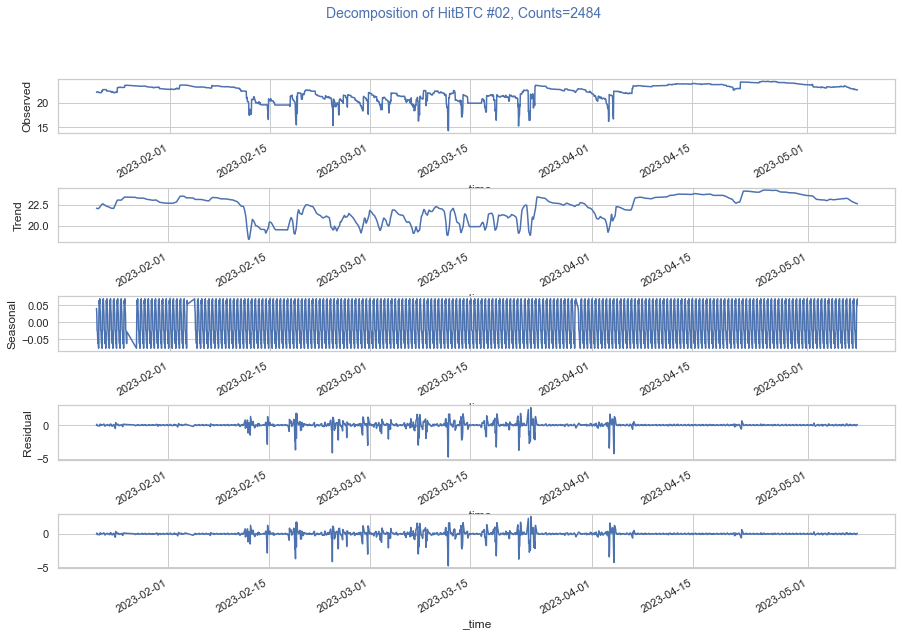

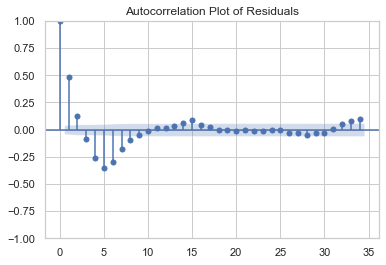

Ljung-Box test results:         lb_stat      lb_pvalue
1    580.609127  2.764289e-128
2    620.804702  1.563046e-135
3    639.820841  2.345936e-138
4    807.922192  1.476857e-173
5   1111.382356  4.583251e-238
6   1330.135602  3.241394e-284
7   1410.283642  2.298547e-300
8   1433.767419  2.827317e-304
9   1439.131867  2.708340e-304
10  1439.430591  3.037159e-303


<Figure size 432x288 with 0 Axes>

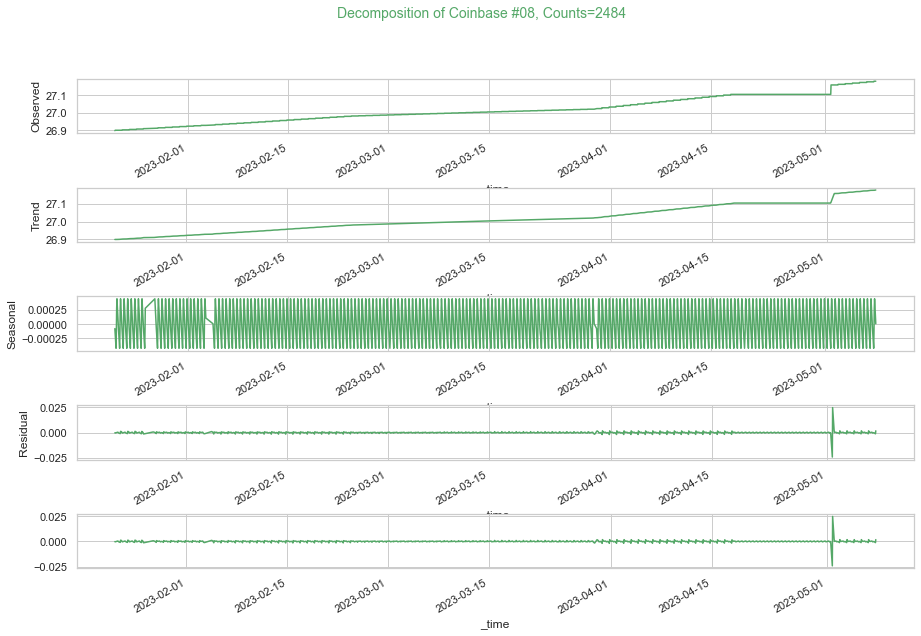

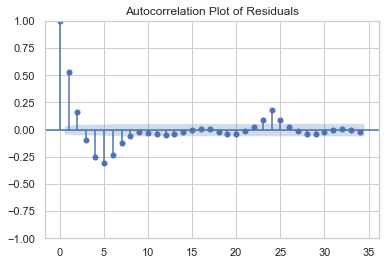

Ljung-Box test results:         lb_stat      lb_pvalue
1    685.631120  3.984352e-151
2    751.502546  6.505724e-164
3    775.315866  9.761968e-168
4    937.903236  1.020829e-201
5   1166.233941  6.048272e-250
6   1299.326755  1.515179e-277
7   1335.701966  3.145954e-284
8   1343.144160  1.109225e-284
9   1344.852951  6.342606e-284
10  1346.660684  3.248129e-283


<Figure size 432x288 with 0 Axes>

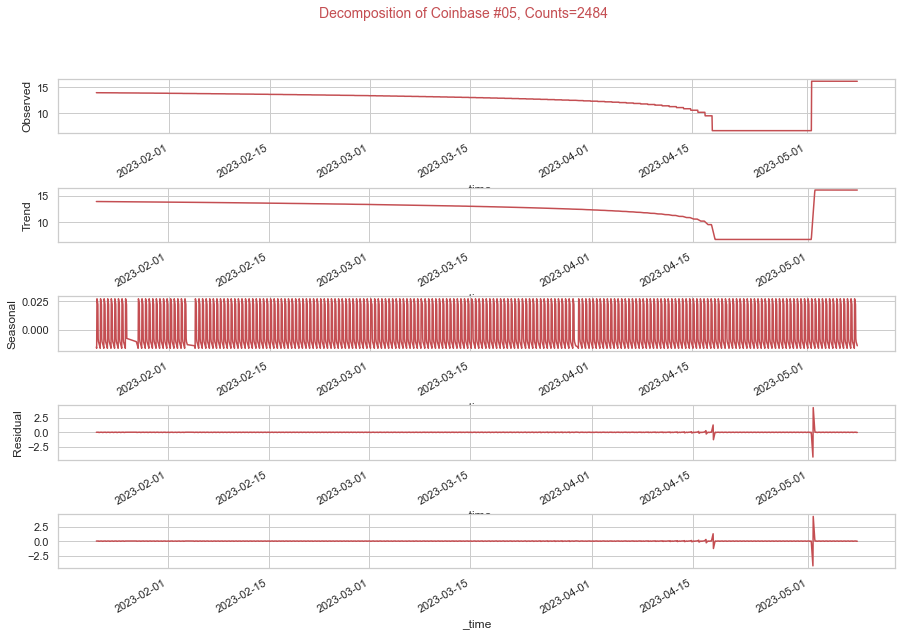

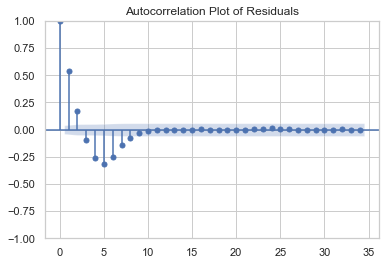

Ljung-Box test results:         lb_stat      lb_pvalue
1    720.271371  1.168557e-158
2    792.392042  8.595169e-173
3    816.927994  9.223647e-177
4    989.556372  6.544124e-213
5   1240.800921  4.265059e-266
6   1399.690845  2.826247e-299
7   1452.265155  1.892726e-309
8   1465.668468  3.570927e-311
9   1468.279314  1.360980e-310
10  1468.674476  1.469364e-309


<Figure size 432x288 with 0 Axes>

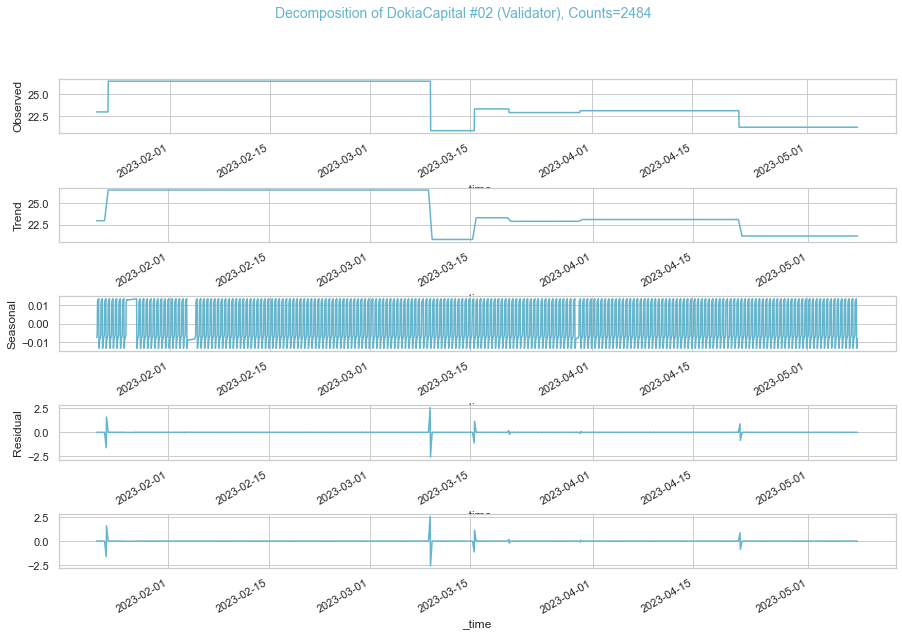

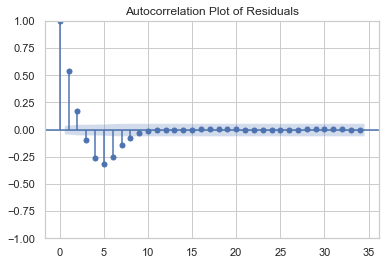

Ljung-Box test results:         lb_stat      lb_pvalue
1    720.910680  8.484647e-159
2    793.130134  5.942643e-173
3    817.854989  5.805690e-177
4    992.159257  1.785586e-213
5   1242.942373  1.465670e-266
6   1401.700263  1.037803e-299
7   1454.439245  6.406371e-310
8   1468.539343  8.549184e-312
9   1471.260500  3.087268e-311
10  1471.619608  3.396858e-310


<Figure size 432x288 with 0 Axes>

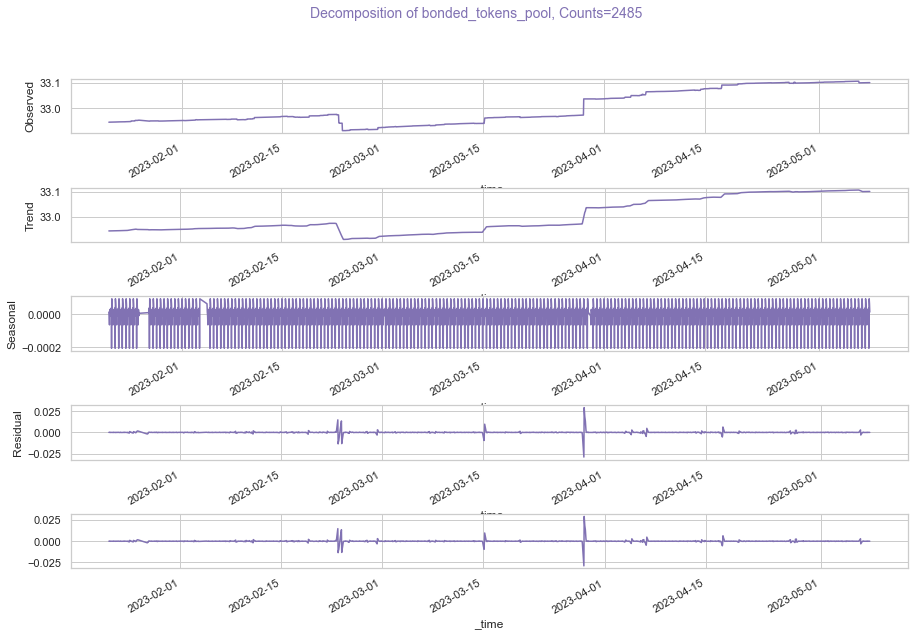

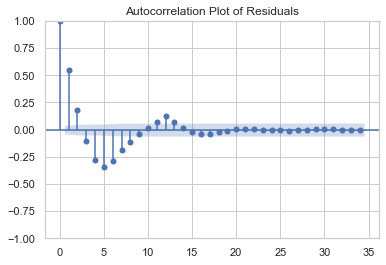

Ljung-Box test results:         lb_stat      lb_pvalue
1    747.274103  1.570765e-164
2    824.265200  1.030590e-179
3    852.079350  2.192851e-184
4   1049.999542  5.205734e-226
5   1344.009595  1.863872e-288
6   1549.076361   0.000000e+00
7   1640.791231   0.000000e+00
8   1672.334577   0.000000e+00
9   1677.217359   0.000000e+00
10  1678.109861   0.000000e+00


<Figure size 432x288 with 0 Axes>

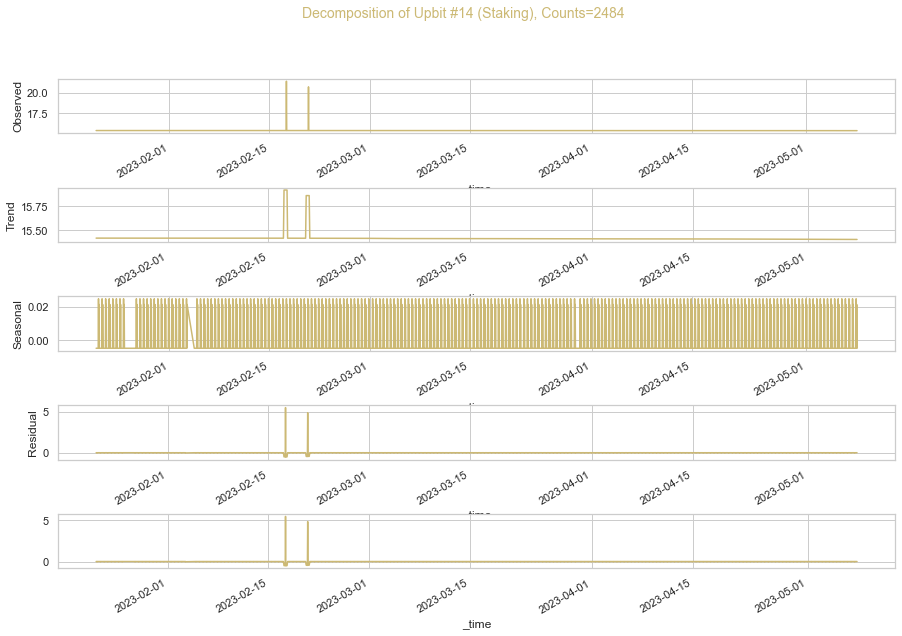

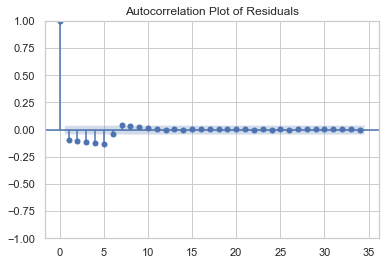

Ljung-Box test results:        lb_stat     lb_pvalue
1    23.970468  9.782474e-07
2    53.226067  2.767620e-12
3    85.239610  2.305276e-18
4   121.713852  2.299117e-25
5   162.947557  2.329427e-33
6   167.957755  1.219240e-33
7   171.745961  1.075430e-33
8   174.199117  1.698562e-33
9   175.606514  4.184373e-33
10  176.059829  1.539430e-32


<Figure size 432x288 with 0 Axes>

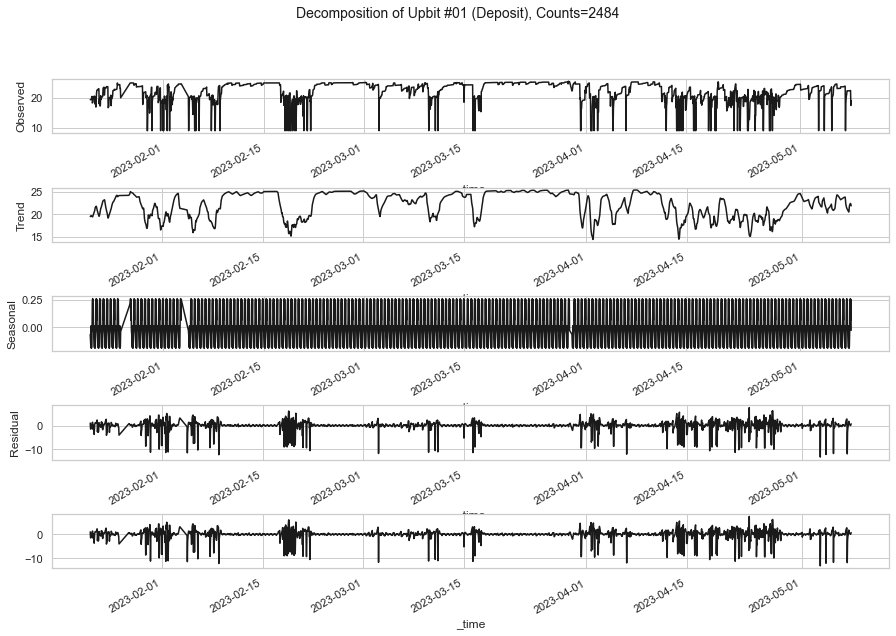

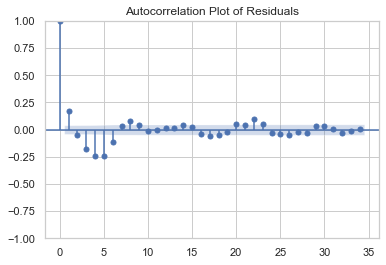

Ljung-Box test results:        lb_stat      lb_pvalue
1    71.943522   2.214456e-17
2    79.158637   6.470240e-18
3   154.746850   2.492752e-33
4   303.538218   1.868741e-64
5   451.402384   2.447741e-95
6   483.227738  3.445391e-101
7   486.314194  7.011733e-101
8   500.198060  6.379344e-103
9   504.647355  5.813931e-103
10  505.075181  3.633432e-102


<Figure size 432x288 with 0 Axes>

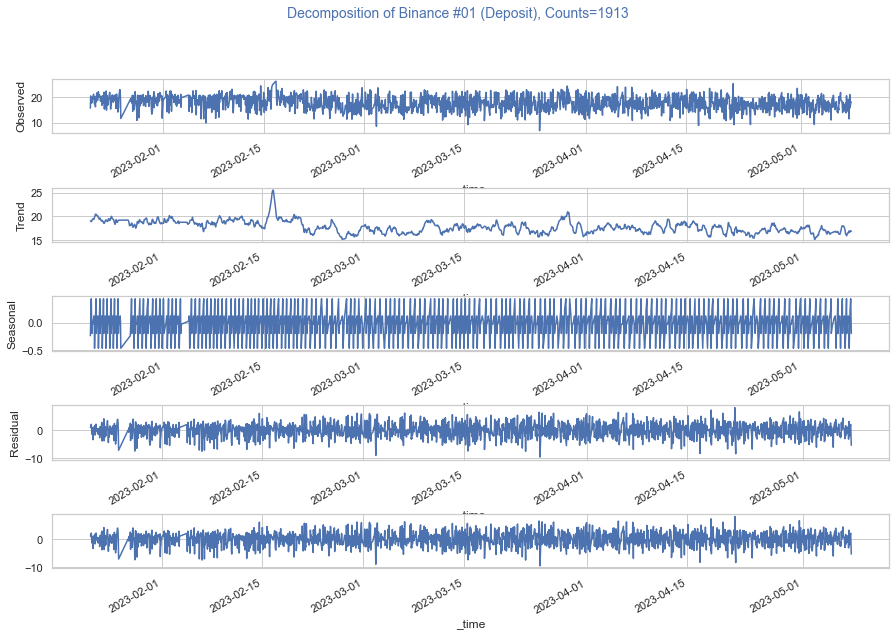

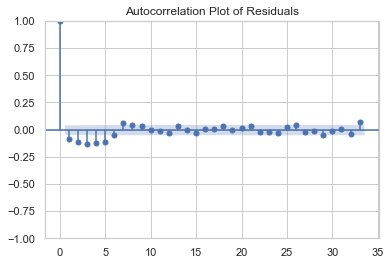

Ljung-Box test results:        lb_stat     lb_pvalue
1    13.994668  1.833297e-04
2    37.026835  9.114333e-09
3    70.061215  4.141432e-15
4   100.607671  7.302501e-21
5   126.383710  1.392352e-25
6   130.693703  9.181893e-26
7   136.740039  2.447942e-26
8   139.446677  3.092706e-26
9   141.680102  4.640543e-26
10  141.680202  1.906802e-25


<Figure size 432x288 with 0 Axes>

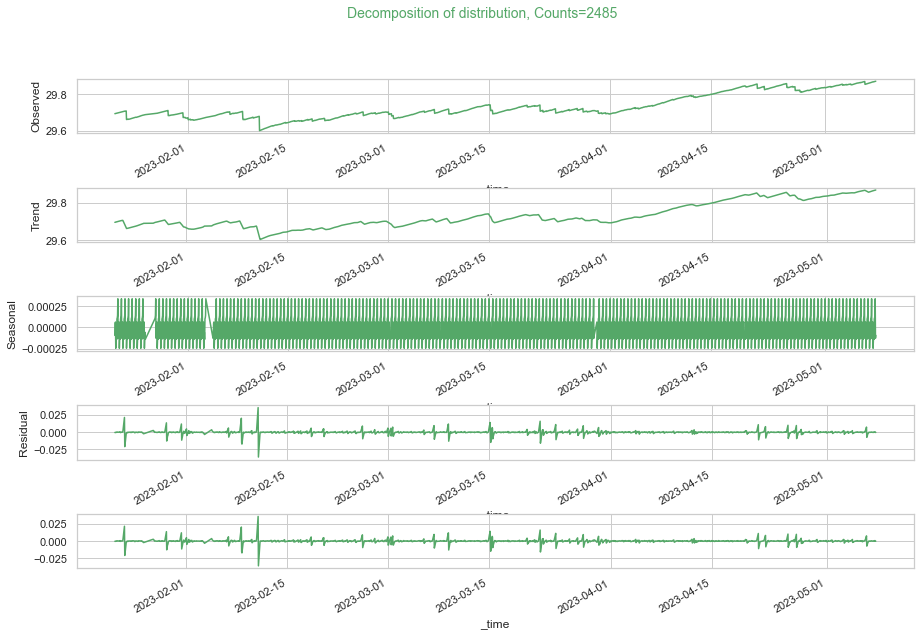

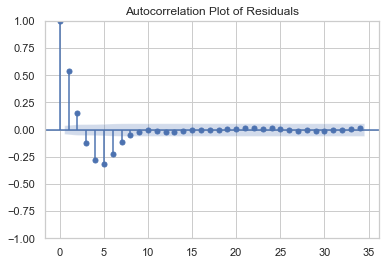

Ljung-Box test results:         lb_stat      lb_pvalue
1    717.092941  5.738457e-158
2    777.960139  1.169775e-169
3    814.730969  2.763104e-176
4   1010.134814  2.271017e-217
5   1265.555847  1.850587e-271
6   1395.230970  2.611510e-298
7   1426.175567  8.369798e-304
8   1432.339714  5.755728e-304
9   1433.290661  4.953719e-303
10  1433.368733  6.186744e-302


<Figure size 432x288 with 0 Axes>

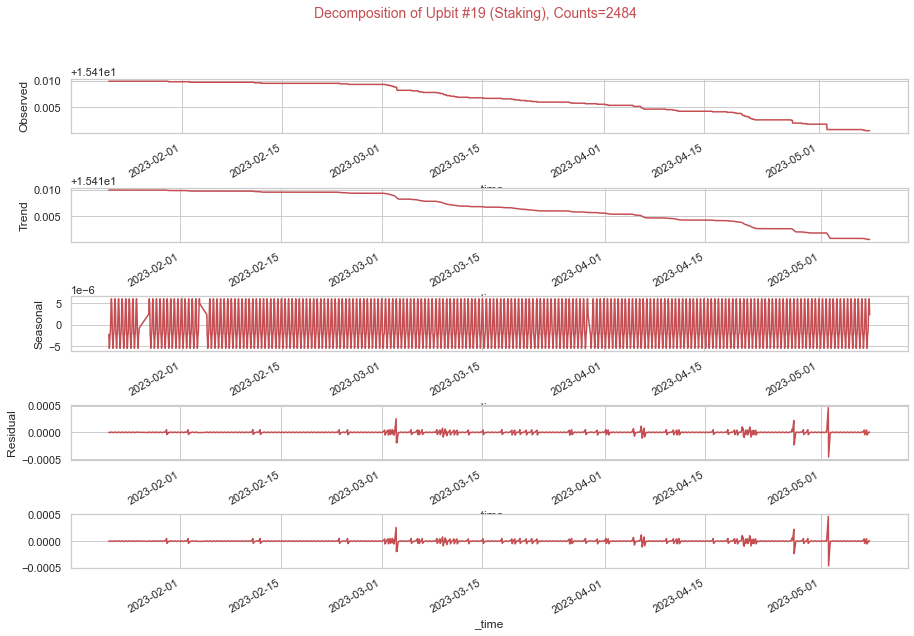

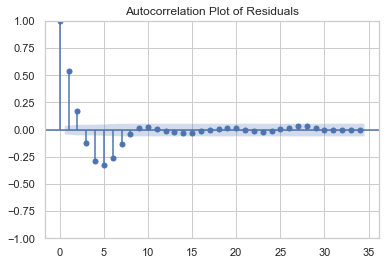

Ljung-Box test results:         lb_stat      lb_pvalue
1    724.111706  1.708364e-159
2    797.080566  8.244309e-174
3    832.724899  3.457779e-180
4   1041.539397  3.548727e-224
5   1307.996677  1.182646e-280
6   1475.454011   0.000000e+00
7   1521.029310   0.000000e+00
8   1524.362519   0.000000e+00
9   1524.880408   0.000000e+00
10  1525.865006   0.000000e+00


<Figure size 432x288 with 0 Axes>

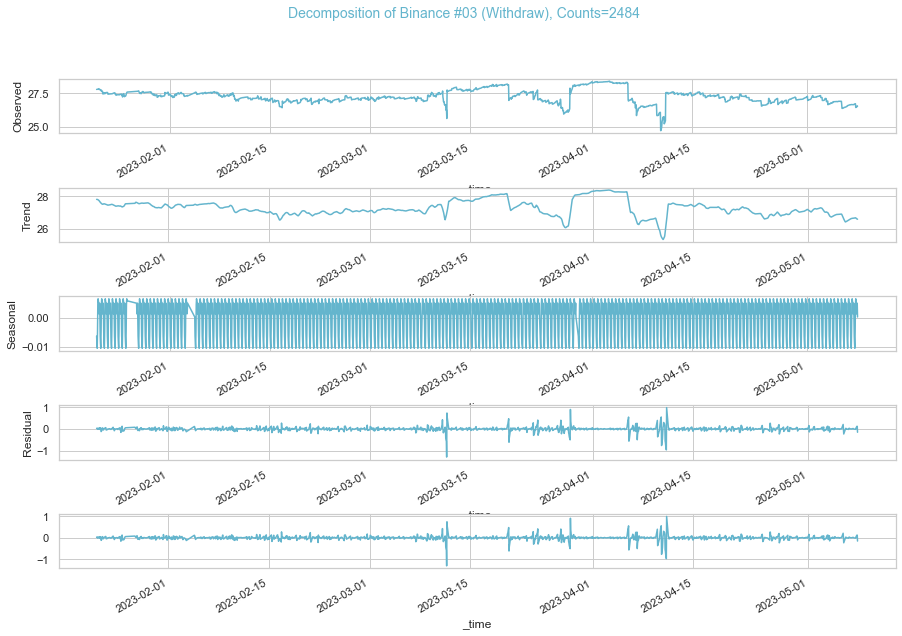

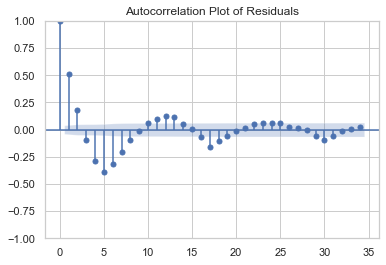

Ljung-Box test results:         lb_stat      lb_pvalue
1    640.142097  3.111973e-141
2    719.424898  6.009916e-157
3    742.994077  9.974753e-161
4    955.654708  1.453436e-205
5   1325.838308  1.612154e-284
6   1579.339564   0.000000e+00
7   1680.995826   0.000000e+00
8   1702.031200   0.000000e+00
9   1702.297265   0.000000e+00
10  1710.109280   0.000000e+00


<Figure size 432x288 with 0 Axes>

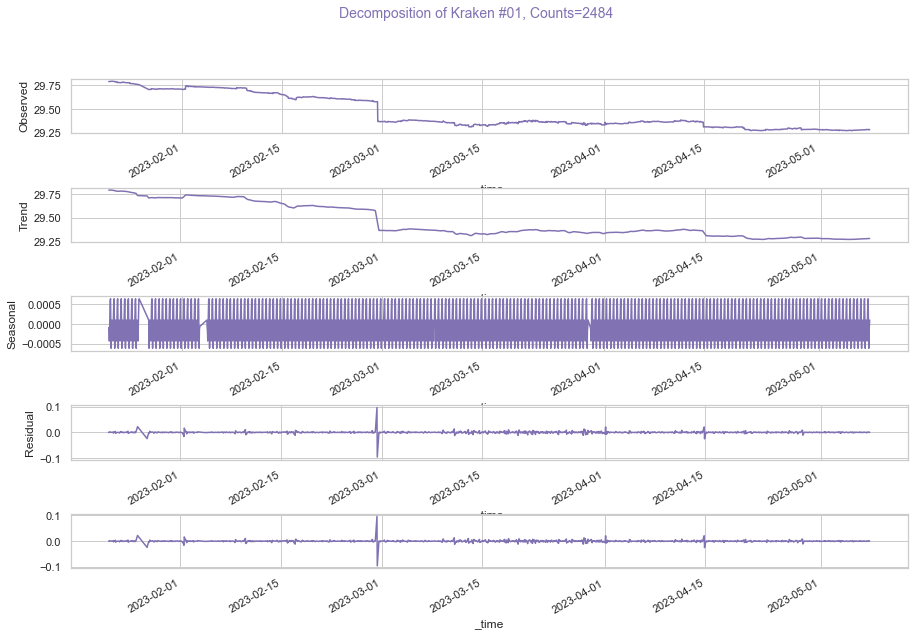

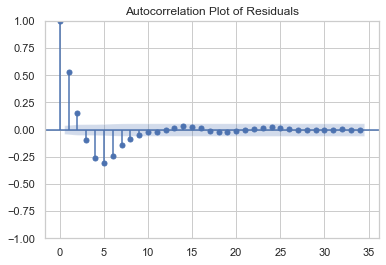

Ljung-Box test results:         lb_stat      lb_pvalue
1    683.033542  1.462973e-150
2    741.830878  8.193542e-162
3    764.768479  1.891937e-165
4    930.122914  4.952434e-200
5   1169.316257  1.300264e-250
6   1319.314187  7.136538e-282
7   1367.551047  4.049108e-291
8   1385.489196  7.767729e-294
9   1390.798857  7.520203e-294
10  1391.920724  5.506577e-293


<Figure size 432x288 with 0 Axes>

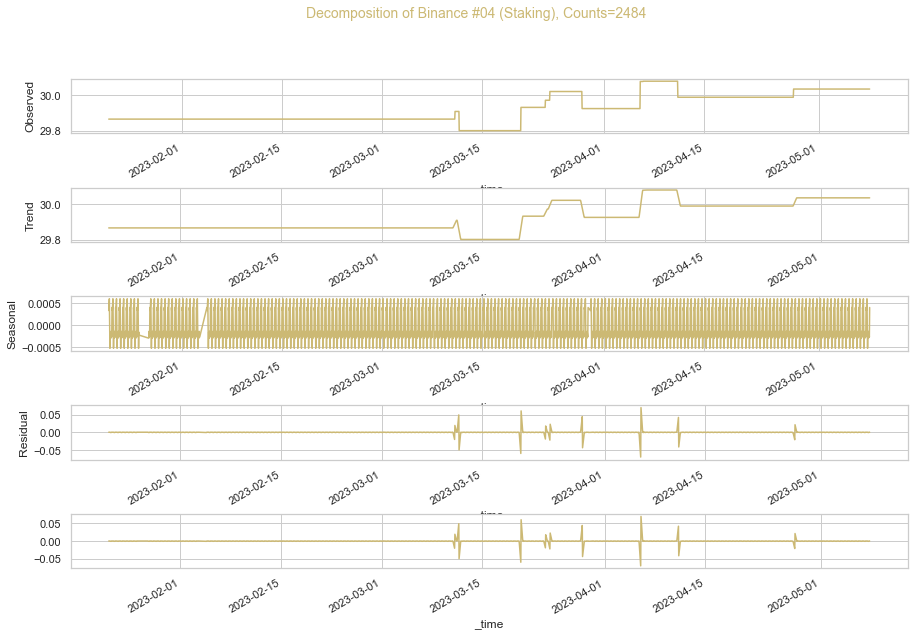

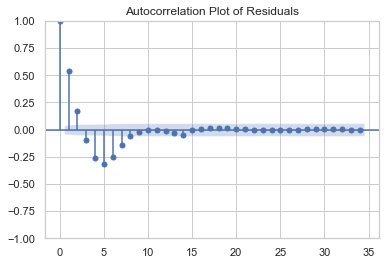

Ljung-Box test results:         lb_stat      lb_pvalue
1    722.029341  4.846005e-159
2    794.613902  2.829981e-173
3    819.511225  2.538897e-177
4    993.843278  7.706112e-214
5   1245.037518  5.154381e-267
6   1402.603222  6.616044e-300
7   1451.497515  2.774632e-309
8   1461.466022  2.894641e-310
9   1462.342894  2.610835e-309
10  1462.342969  3.423765e-308


<Figure size 432x288 with 0 Axes>

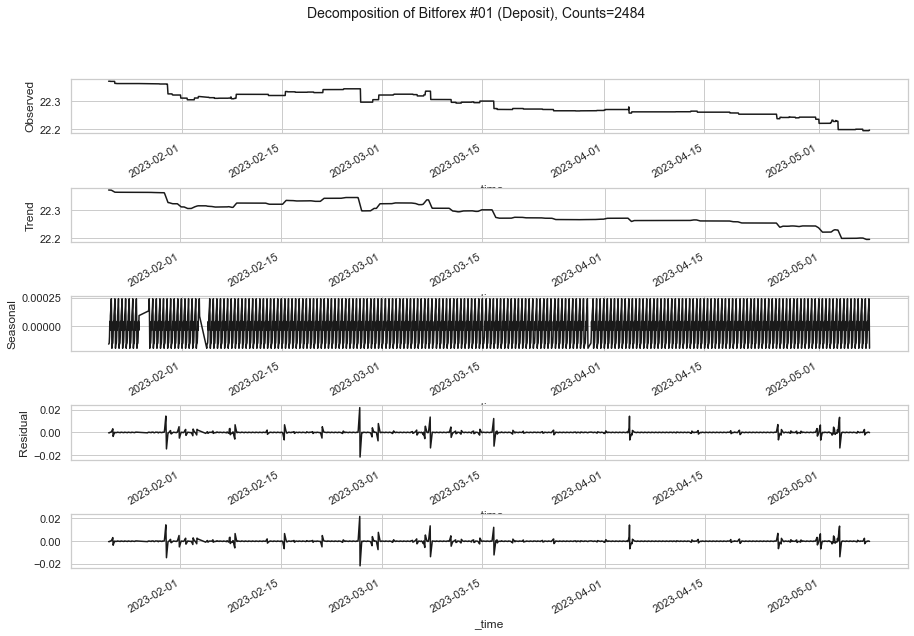

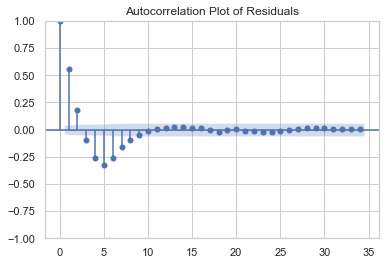

Ljung-Box test results:         lb_stat      lb_pvalue
1    769.944658  1.848374e-169
2    851.155240  1.492753e-185
3    873.802337  4.259673e-189
4   1046.632434  2.794139e-225
5   1303.738998  9.891850e-280
6   1474.026518   0.000000e+00
7   1536.667176   0.000000e+00
8   1560.512469   0.000000e+00
9   1567.730816   0.000000e+00
10  1568.397401   0.000000e+00


<Figure size 432x288 with 0 Axes>

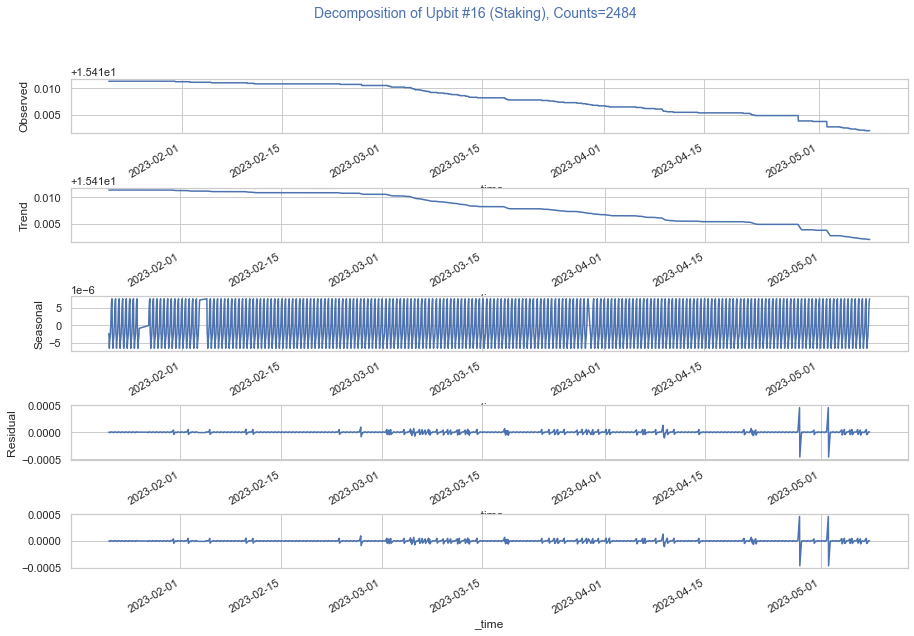

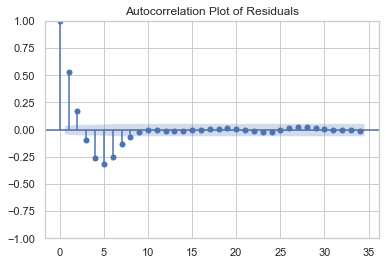

Ljung-Box test results:         lb_stat      lb_pvalue
1    705.937085  1.529867e-155
2    775.014413  5.102211e-169
3    799.542598  5.437933e-173
4    972.428689  3.369094e-209
5   1227.646952  3.015376e-263
6   1379.916378  5.405555e-295
7   1424.538591  1.892058e-303
8   1435.454171  1.220761e-304
9   1436.488059  1.009271e-303
10  1436.620831  1.228031e-302


<Figure size 432x288 with 0 Axes>

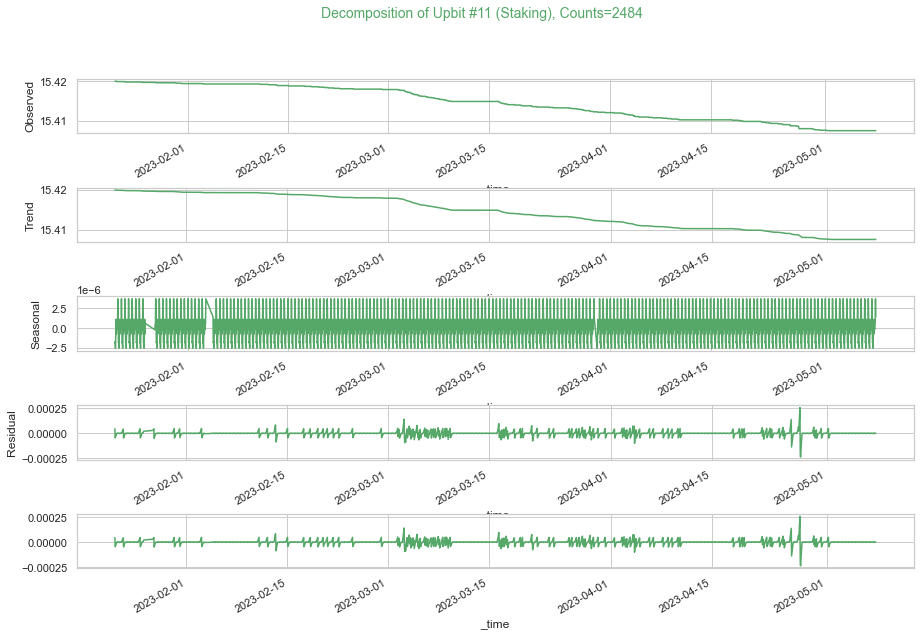

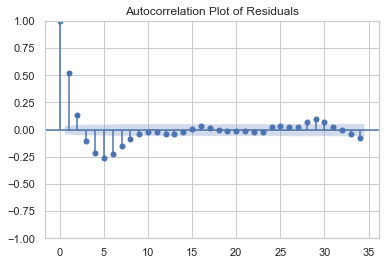

Ljung-Box test results:         lb_stat      lb_pvalue
1    659.523993  1.896065e-145
2    707.053465  2.919382e-154
3    733.272112  1.279817e-158
4    851.003908  6.867054e-183
5   1018.771301  5.186028e-218
6   1141.560577  2.121779e-243
7   1196.784950  3.500696e-254
8   1216.348894  2.813655e-257
9   1220.723589  4.070480e-257
10  1221.652080  3.075593e-256


<Figure size 432x288 with 0 Axes>

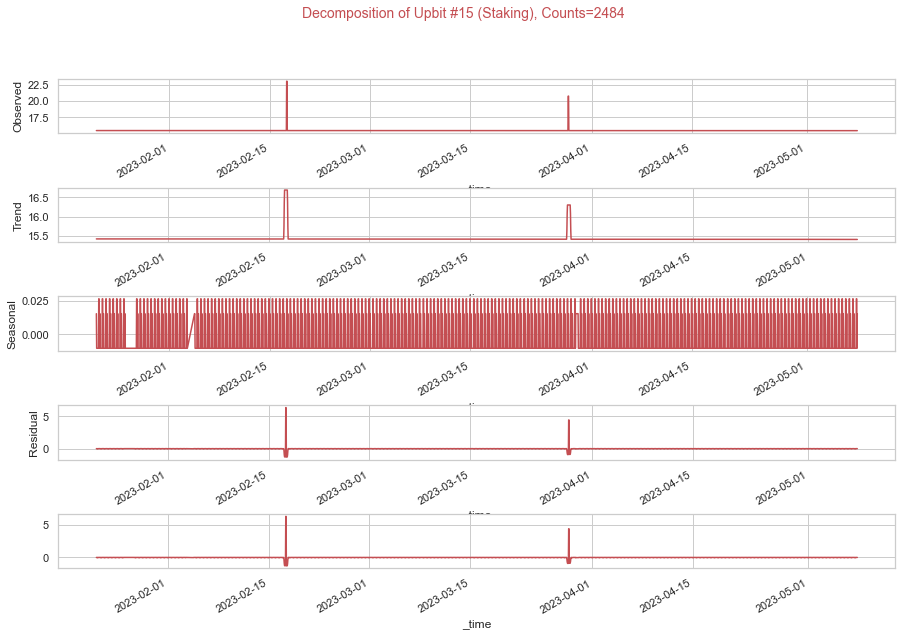

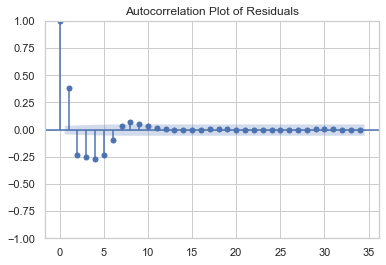

Ljung-Box test results:         lb_stat      lb_pvalue
1    369.857185   2.010432e-82
2    508.597735  3.625811e-111
3    669.719020  7.724957e-145
4    851.164663  6.337889e-183
5    988.438536  1.913638e-211
6   1013.116293  1.301774e-215
7   1016.298173  3.624057e-215
8   1027.877756  1.433184e-216
9   1034.076879  7.721266e-217
10  1037.020301  1.977323e-216


<Figure size 432x288 with 0 Axes>

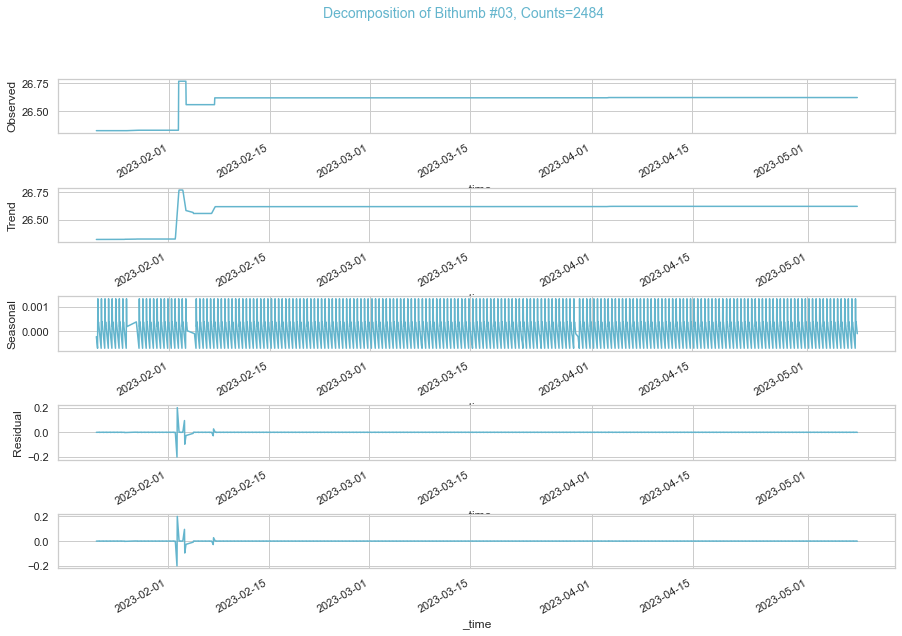

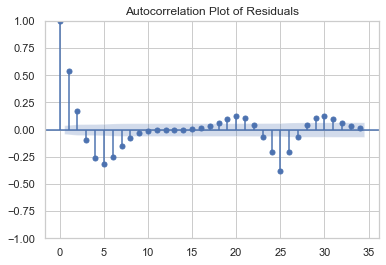

Ljung-Box test results:         lb_stat      lb_pvalue
1    725.221073  9.802864e-160
2    798.047458  5.083892e-174
3    822.672354  5.236589e-178
4    997.837487  1.050128e-214
5   1251.681683  1.874460e-268
6   1413.018113  3.676632e-302
7   1467.505857   0.000000e+00
8   1482.047421   0.000000e+00
9   1484.766390   0.000000e+00
10  1485.057122   0.000000e+00


<Figure size 432x288 with 0 Axes>

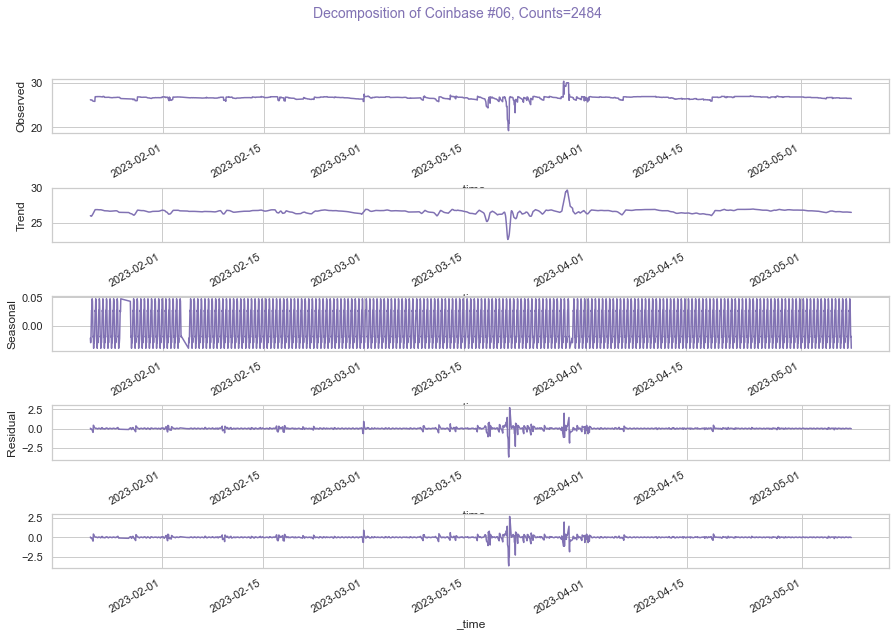

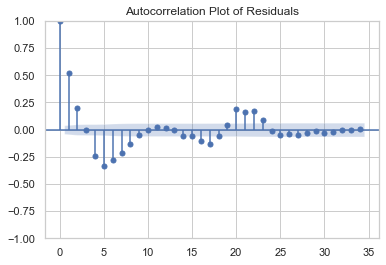

Ljung-Box test results:         lb_stat      lb_pvalue
1    659.139915  2.298164e-145
2    760.633590  6.768846e-166
3    760.665980  1.467534e-164
4    905.805023  9.202398e-195
5   1186.162936  2.918263e-254
6   1381.374438  2.613018e-295
7   1501.232229   0.000000e+00
8   1547.120758   0.000000e+00
9   1552.767857   0.000000e+00
10  1552.934978   0.000000e+00


<Figure size 432x288 with 0 Axes>

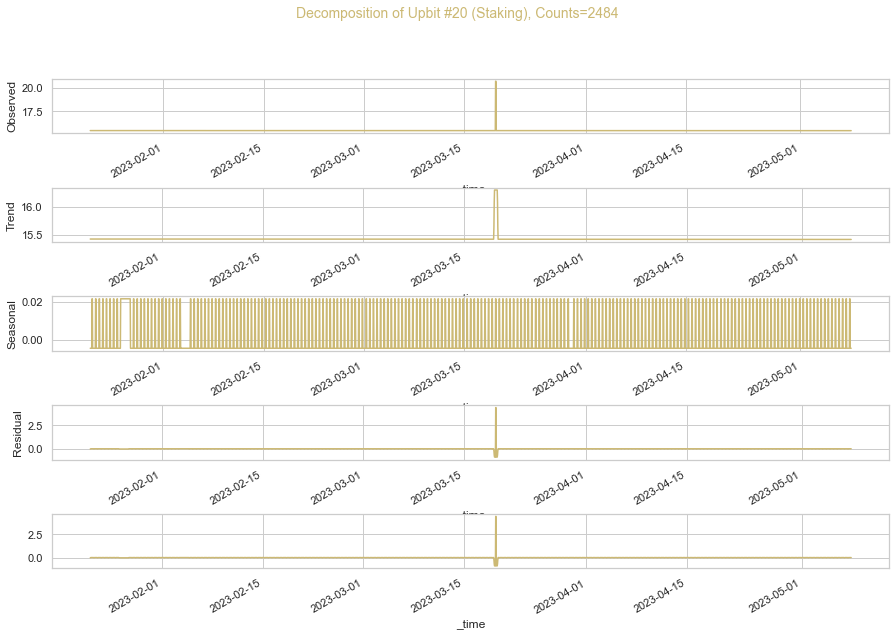

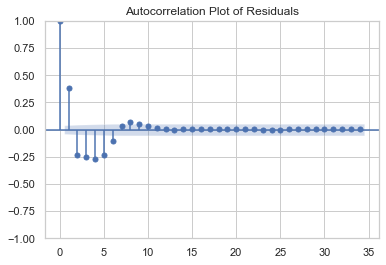

Ljung-Box test results:         lb_stat      lb_pvalue
1    368.782386   3.445938e-82
2    507.225700  7.200105e-111
3    666.303751  4.250161e-144
4    847.458569  4.025521e-182
5    986.063099  6.253385e-211
6   1011.250197  3.297273e-215
7   1014.272297  9.929930e-215
8   1026.029116  3.592430e-216
9   1032.708172  1.523667e-216
10  1035.734625  3.742032e-216


<Figure size 432x288 with 0 Axes>

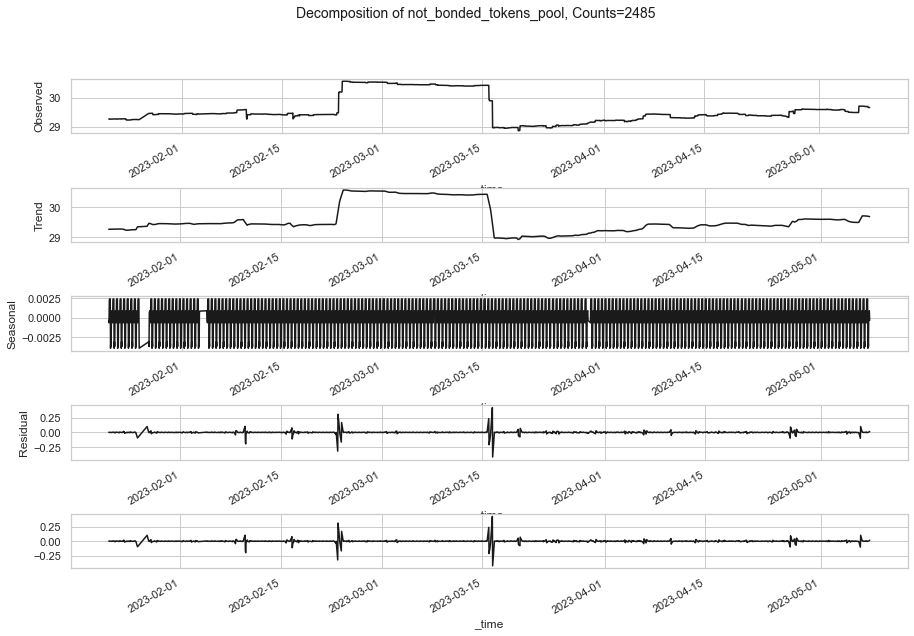

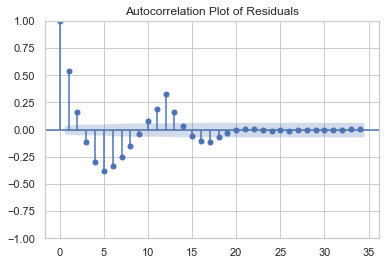

Ljung-Box test results:         lb_stat      lb_pvalue
1    719.216272  1.981889e-158
2    783.886933  6.041090e-171
3    816.999661  8.899373e-177
4   1038.289712  1.796296e-223
5   1398.392115  3.070465e-300
6   1682.693198   0.000000e+00
7   1836.857410   0.000000e+00
8   1894.410914   0.000000e+00
9   1899.442820   0.000000e+00
10  1913.299790   0.000000e+00


<Figure size 432x288 with 0 Axes>

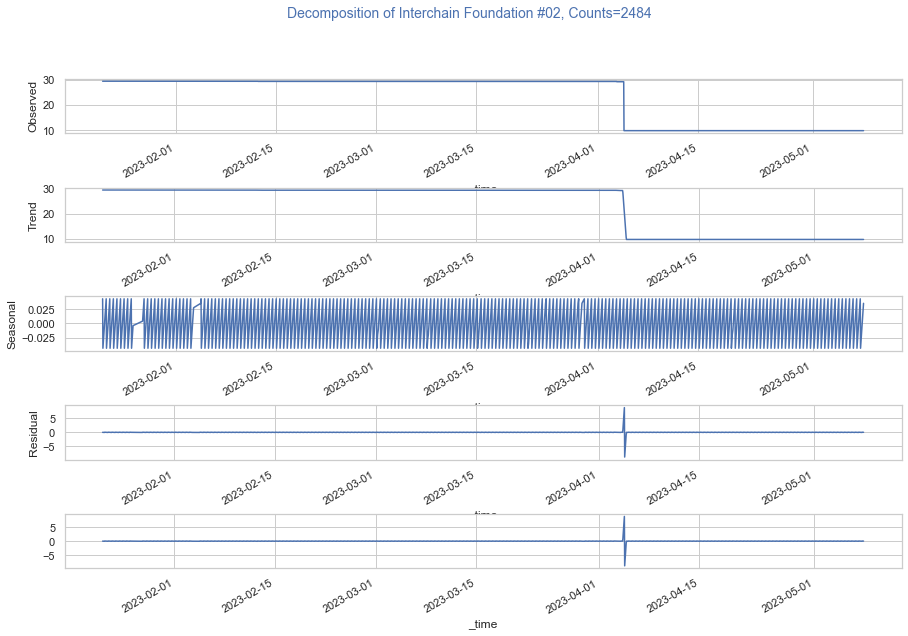

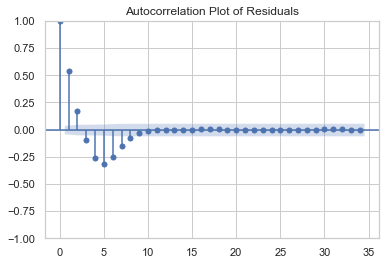

Ljung-Box test results:         lb_stat      lb_pvalue
1    722.303338  4.224780e-159
2    795.027861  2.300877e-173
3    819.542319  2.499777e-177
4    994.025585  7.036023e-214
5   1246.615320  2.346308e-267
6   1406.601286  9.013606e-301
7   1460.233438  3.570507e-311
8   1474.422210   0.000000e+00
9   1477.080518   0.000000e+00
10  1477.399635  1.917614e-311


<Figure size 432x288 with 0 Axes>

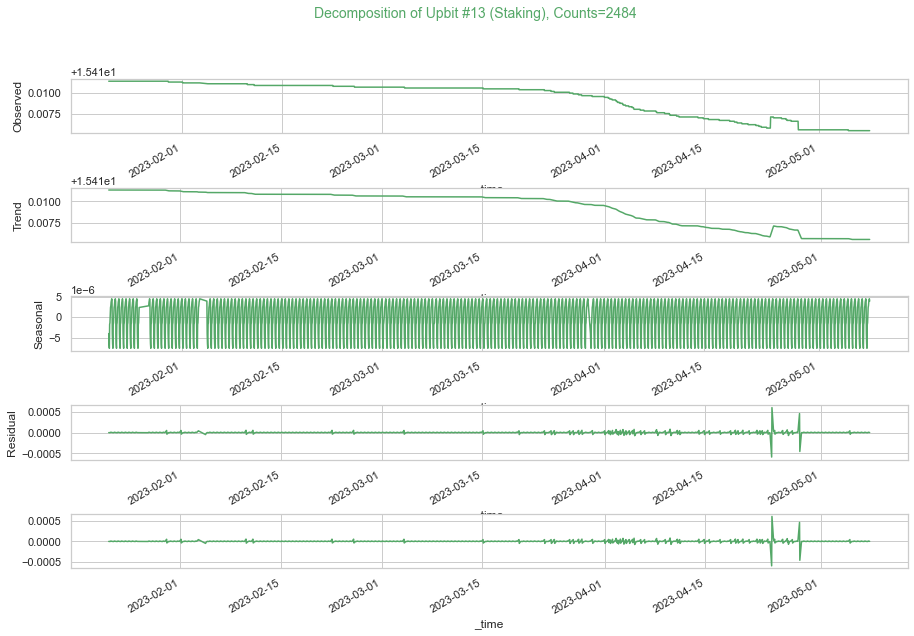

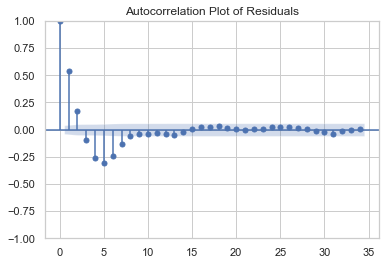

Ljung-Box test results:         lb_stat      lb_pvalue
1    714.721144  1.881663e-157
2    787.607379  9.402227e-172
3    809.467296  3.828118e-175
4    973.346725  2.130949e-209
5   1206.085841  1.411735e-258
6   1348.322380  3.743702e-288
7   1390.739814  3.892352e-296
8   1400.658227  4.078942e-297
9   1404.369037  8.795094e-297
10  1409.395982  9.285830e-297


<Figure size 432x288 with 0 Axes>

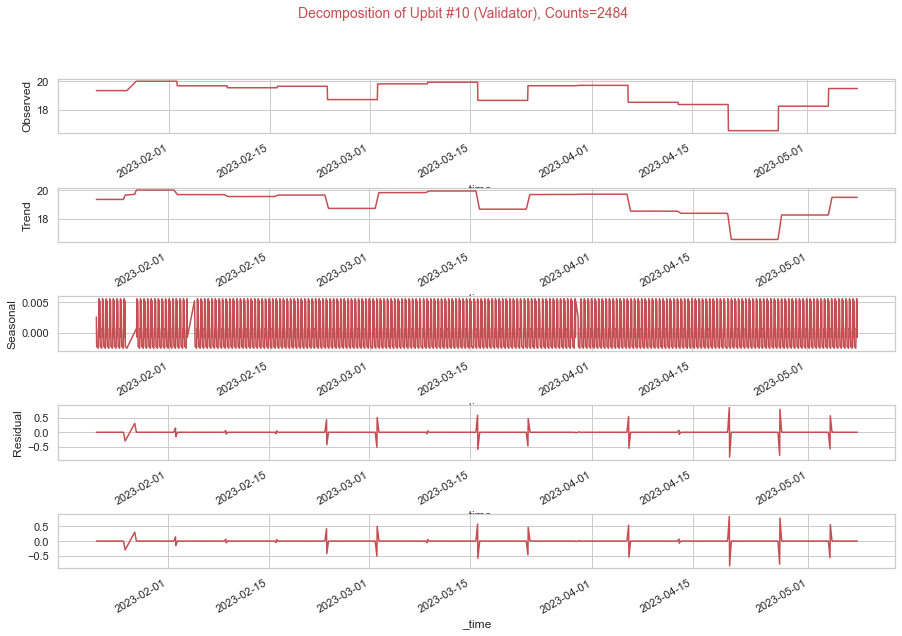

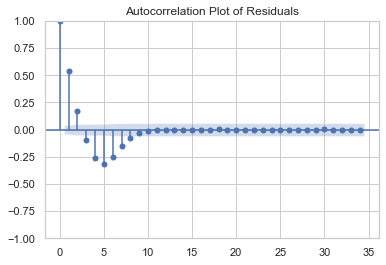

Ljung-Box test results:         lb_stat      lb_pvalue
1    723.176788  2.728193e-159
2    795.677150  1.663038e-173
3    820.346131  1.673278e-177
4    995.309370  3.707800e-214
5   1248.617442  8.643176e-268
6   1409.458274  2.169060e-301
7   1463.866405   0.000000e+00
8   1478.446105   0.000000e+00
9   1481.194375   0.000000e+00
10  1481.492590   0.000000e+00


<Figure size 432x288 with 0 Axes>

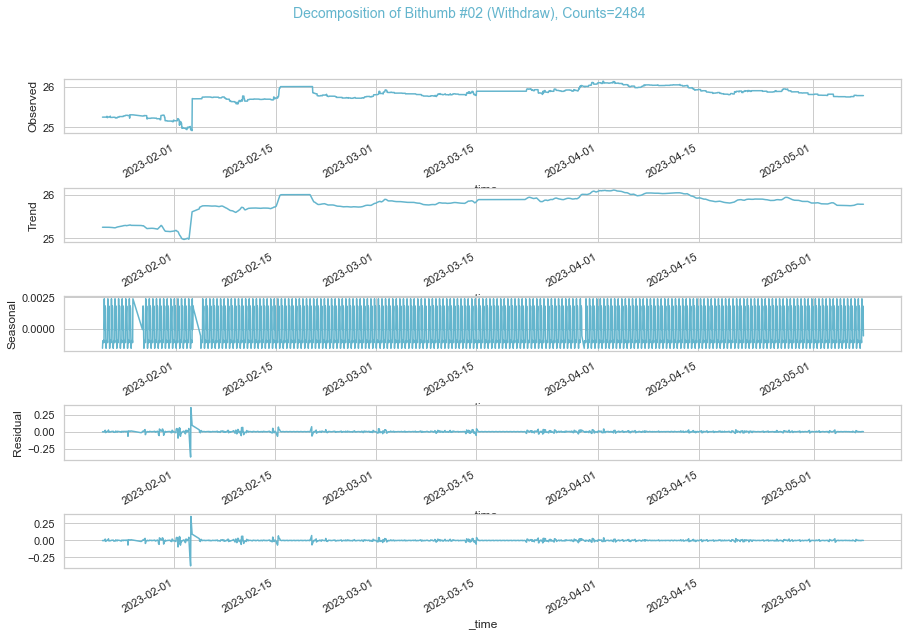

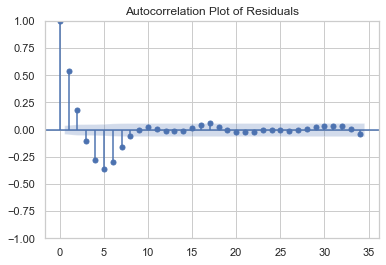

Ljung-Box test results:         lb_stat      lb_pvalue
1    724.477379  1.422546e-159
2    803.183961  3.897794e-175
3    830.954749  8.369884e-180
4   1024.777474  1.523510e-220
5   1352.123052  3.254740e-290
6   1577.673097   0.000000e+00
7   1639.073391   0.000000e+00
8   1646.984985   0.000000e+00
9   1647.147505   0.000000e+00
10  1648.234158   0.000000e+00


<Figure size 432x288 with 0 Axes>

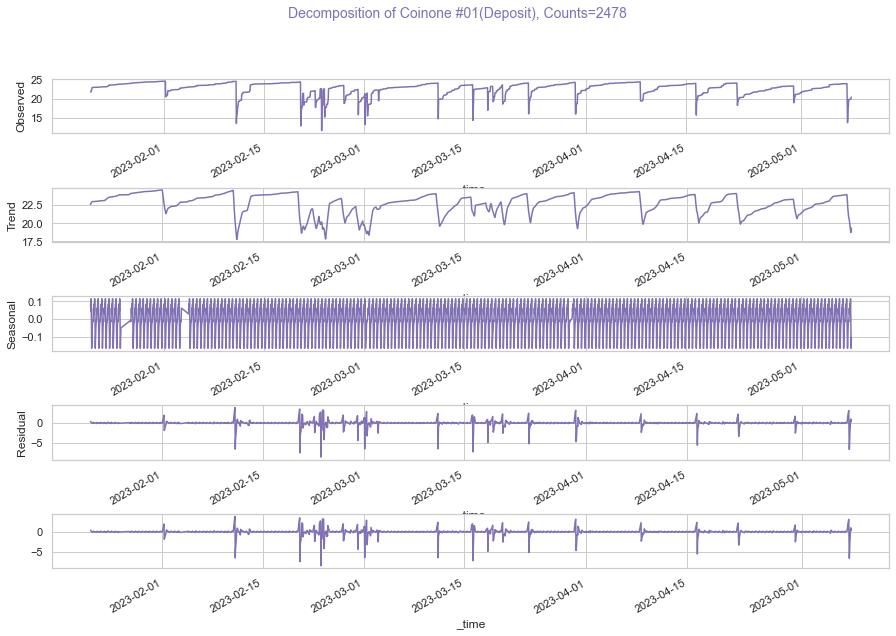

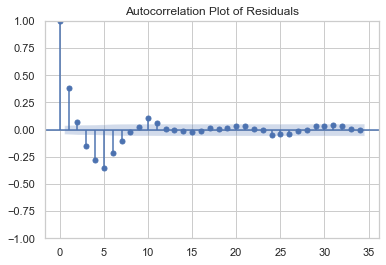

Ljung-Box test results:         lb_stat      lb_pvalue
1    355.136833   3.225109e-79
2    366.161435   3.083575e-80
3    421.685007   4.443494e-91
4    610.672446  7.592093e-131
5    919.943625  1.284270e-196
6   1033.579313  4.879578e-220
7   1062.841627  3.169110e-225
8   1063.935227  2.351564e-224
9   1065.201218  1.493186e-223
10  1093.347586  1.433751e-228


<Figure size 432x288 with 0 Axes>

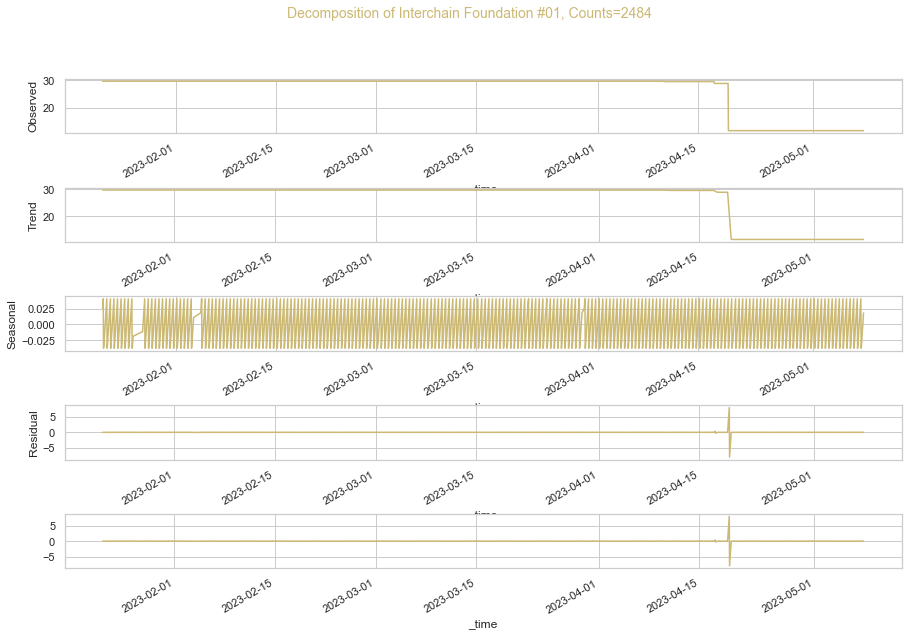

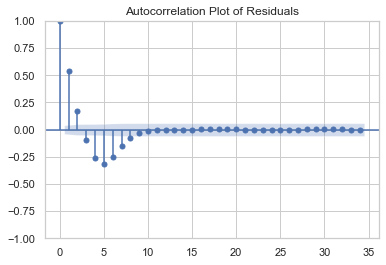

Ljung-Box test results:         lb_stat      lb_pvalue
1    721.987499  4.948601e-159
2    794.671718  2.749344e-173
3    819.182473  2.991891e-177
4    993.582662  8.776344e-214
5   1245.992245  3.201540e-267
6   1405.797179  1.345898e-300
7   1459.317394  5.635936e-311
8   1473.464671   0.000000e+00
9   1476.117697   0.000000e+00
10  1476.441706  3.087788e-311


<Figure size 432x288 with 0 Axes>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Set the background color to white
sns.set(style="whitegrid")

# Assuming 'date' is your time column and 'value' is the value you want to decompose
# Replace 'data.csv' with your csv file
df = pd.read_csv('data.csv')
df['_time'] = pd.to_datetime(df['_time'])

# 데이터 전처리
df = df[df['amountValue'] != -1]
df['log_amountValue'] = np.log(df['amountValue'])
data = df[df['_time'] >= '2023-01-21T17:00:00Z']
counts = df['moduleName'].value_counts()
#print(counts)
df = df[df['moduleName'].isin(counts[counts >= 1800].index)]

df.set_index('_time', inplace=True)

# Define a list of colors for different moduleNames
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the unique moduleNames
module_names = df['moduleName'].unique()

for i, module_name in enumerate(module_names):
    # Filter the data for the current moduleName
    mcounts = df['moduleName'].value_counts()
    module_data, mcounts = df[df['moduleName'] == module_name], mcounts[module_name]
    
    # Decompose the time series
    result = seasonal_decompose(module_data['log_amountValue'], model='additive', period=12)
    
    # Create figure and subplots
    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5, figsize=(15, 10))  # Adjust size here
    
    # Adjust suptitle
    fig.suptitle(f'Decomposition of {module_name}, Counts={mcounts}'
                 , fontsize=14, color=colors[i % len(colors)])

    plt.subplots_adjust(hspace=1.0)  # Adjust vertical spacing

    # Plot the components of the decomposition
    result.observed.plot(ax=ax1, legend=False, color=colors[i % len(colors)])
    ax1.set_ylabel('Observed')
    result.trend.plot(ax=ax2, legend=False, color=colors[i % len(colors)])
    ax2.set_ylabel('Trend')
    result.seasonal.plot(ax=ax3, legend=False, color=colors[i % len(colors)])
    ax3.set_ylabel('Seasonal')
    result.resid.plot(ax=ax4, legend=False, color=colors[i % len(colors)])
    ax4.set_ylabel('Residual')
    result.resid.dropna().plot(ax=ax5, legend=False, color=colors[i % len(colors)])
    plot_acf(result.resid.dropna())
    plt.title('Autocorrelation Plot of Residuals')
    plt.show()
    ljung_box_results = acorr_ljungbox(result.resid.dropna())
    # lag = 0
    # for p_value in ljung_box_results[1]:  # ljung_box_results[1] contains the p-values
    #     lag += 1
    #     if p_value < 0.05:
    #         print(f"Lag {lag}: {p_value} is significant")
    #???
    print('Ljung-Box test results:', ljung_box_results)

    
    # Save the figure to a file
    module_name_no_spaces = module_name.replace(' ', '')
    plt.savefig(f'decompose-{module_name_no_spaces}.png')
    
plt.show()
